<h1><b>EDA of Spotify and Youtube Music Data</b></h1>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('Spotify_Youtube.csv')

In [7]:
#remove the rows with missing values
df = df.dropna()

#remove the unnamed column
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

#remove the columns 'Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description'
df = df.drop(['Url_spotify', 'Uri', 'Url_youtube', 'Title', 'Channel', 'Description'], axis=1)

<b>Track</b>: name of the song, as visible on the Spotify platform.<br>
<b>Artist</b>: name of the artist.<br>
<b>Album</b>: the album in wich the song is contained on Spotify. <br>
<b>Album_type</b>: indicates if the song is relesead on Spotify as a single or contained in an album. <br>
<b>Danceability</b>: describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. <br>
<b>Energy</b>: is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. <br>
<b>Loudness</b>: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db. <br>
<b>Speechiness</b>: detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.<br>
<b>Acousticness</b>: a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. <br>
<b>Instrumentalness</b>: predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. <br>
<b>Liveness</b>: detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. <br>
<b>Valence</b>: a measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). <br>
<b>Tempo</b>: the overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. <br>
<b>Duration_ms</b>: the duration of the track in milliseconds. <br>
<b>Stream</b>: number of streams of the song on Spotify. <br>
<b>Views</b>: number of views. <br>
<b>Likes</b>: number of likes. <br>
<b>Comments</b>: number of comments. <br>
<b> official_video</b>: boolean value that indicates if the video found is the official video of the song.

<h2> Top Songs on Spotify </h2>

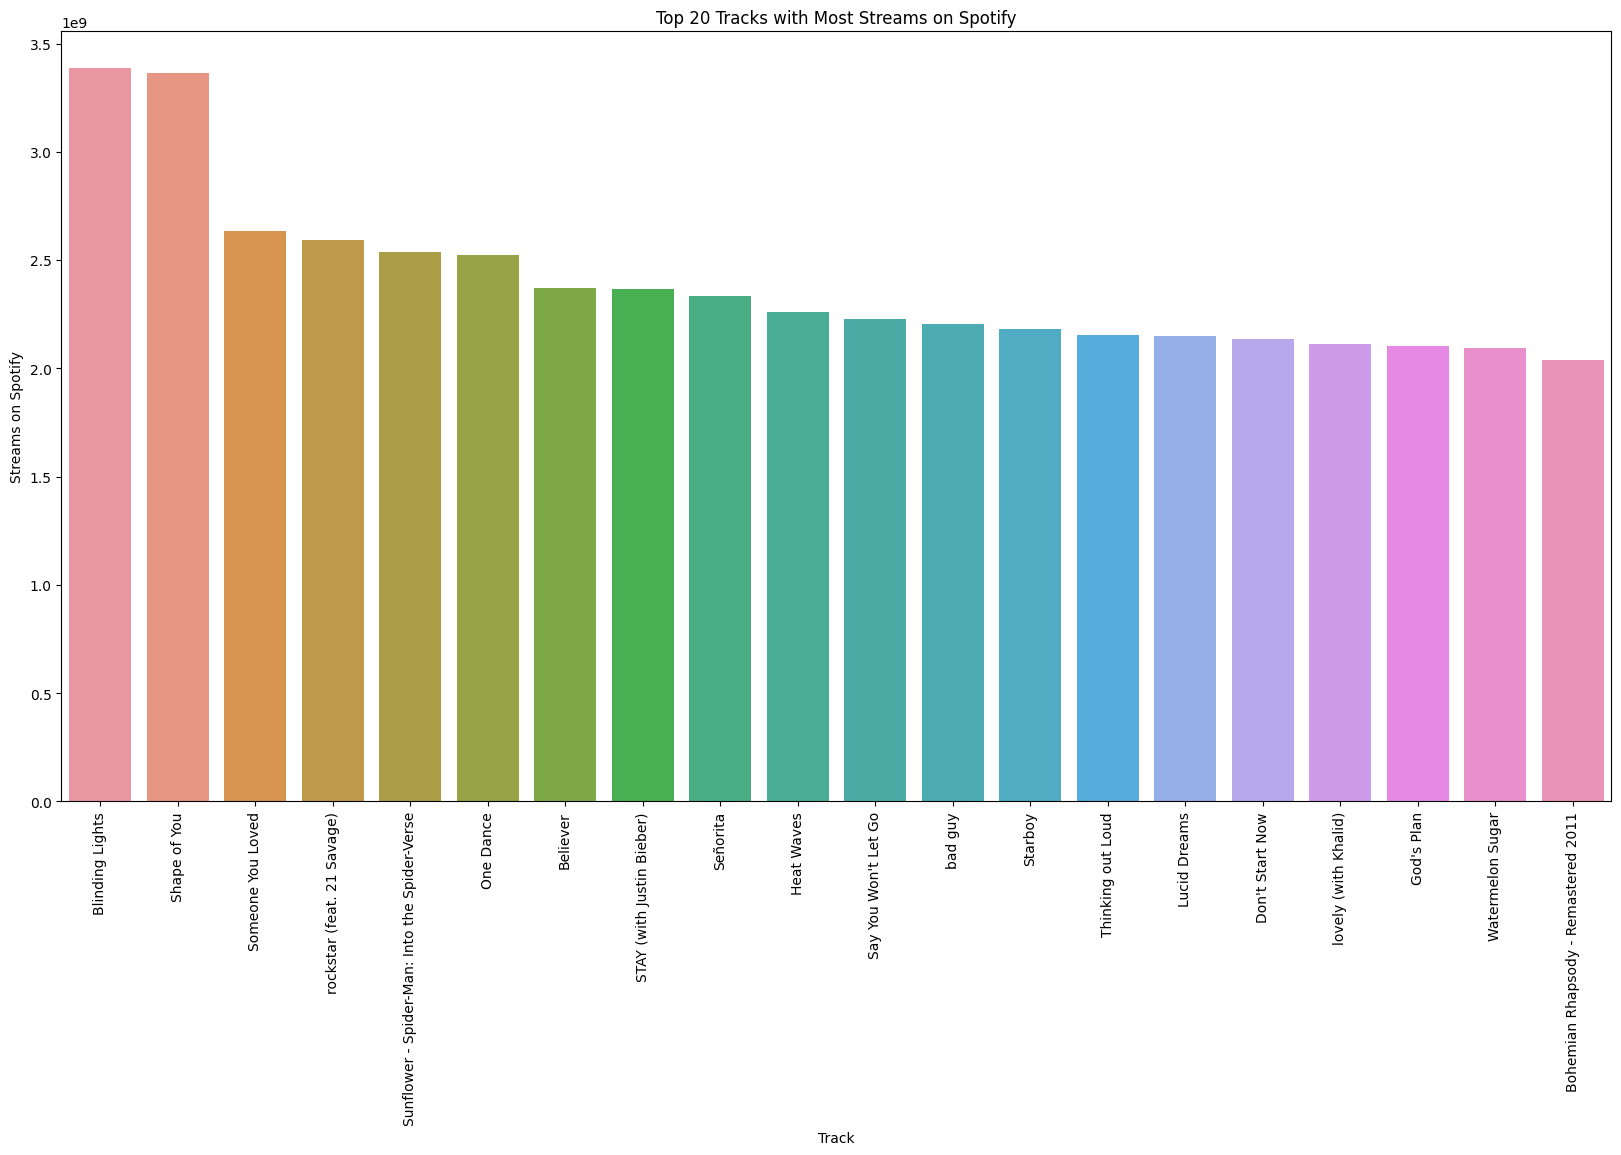

In [8]:
top_20_songs_on_spotify = df[['Track', 'Stream']]
top_20_songs_on_spotify = top_20_songs_on_spotify.drop_duplicates(subset=['Track'], keep='first')

#top 20 tracks with most streams
top_20_songs_on_spotify = top_20_songs_on_spotify.sort_values(by=['Stream'], ascending=False)
top_20_songs_on_spotify = top_20_songs_on_spotify.head(20)

#plot the top 20 tracks with most streams
plt.figure(figsize=(20,10))
sns.barplot(x='Track', y='Stream', data = top_20_songs_on_spotify)
plt.xticks(rotation=90)
plt.ylabel('Streams on Spotify')
plt.title('Top 20 Tracks with Most Streams on Spotify')
plt.show()


<h2> Top Songs on Youtube </h2>

C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE 

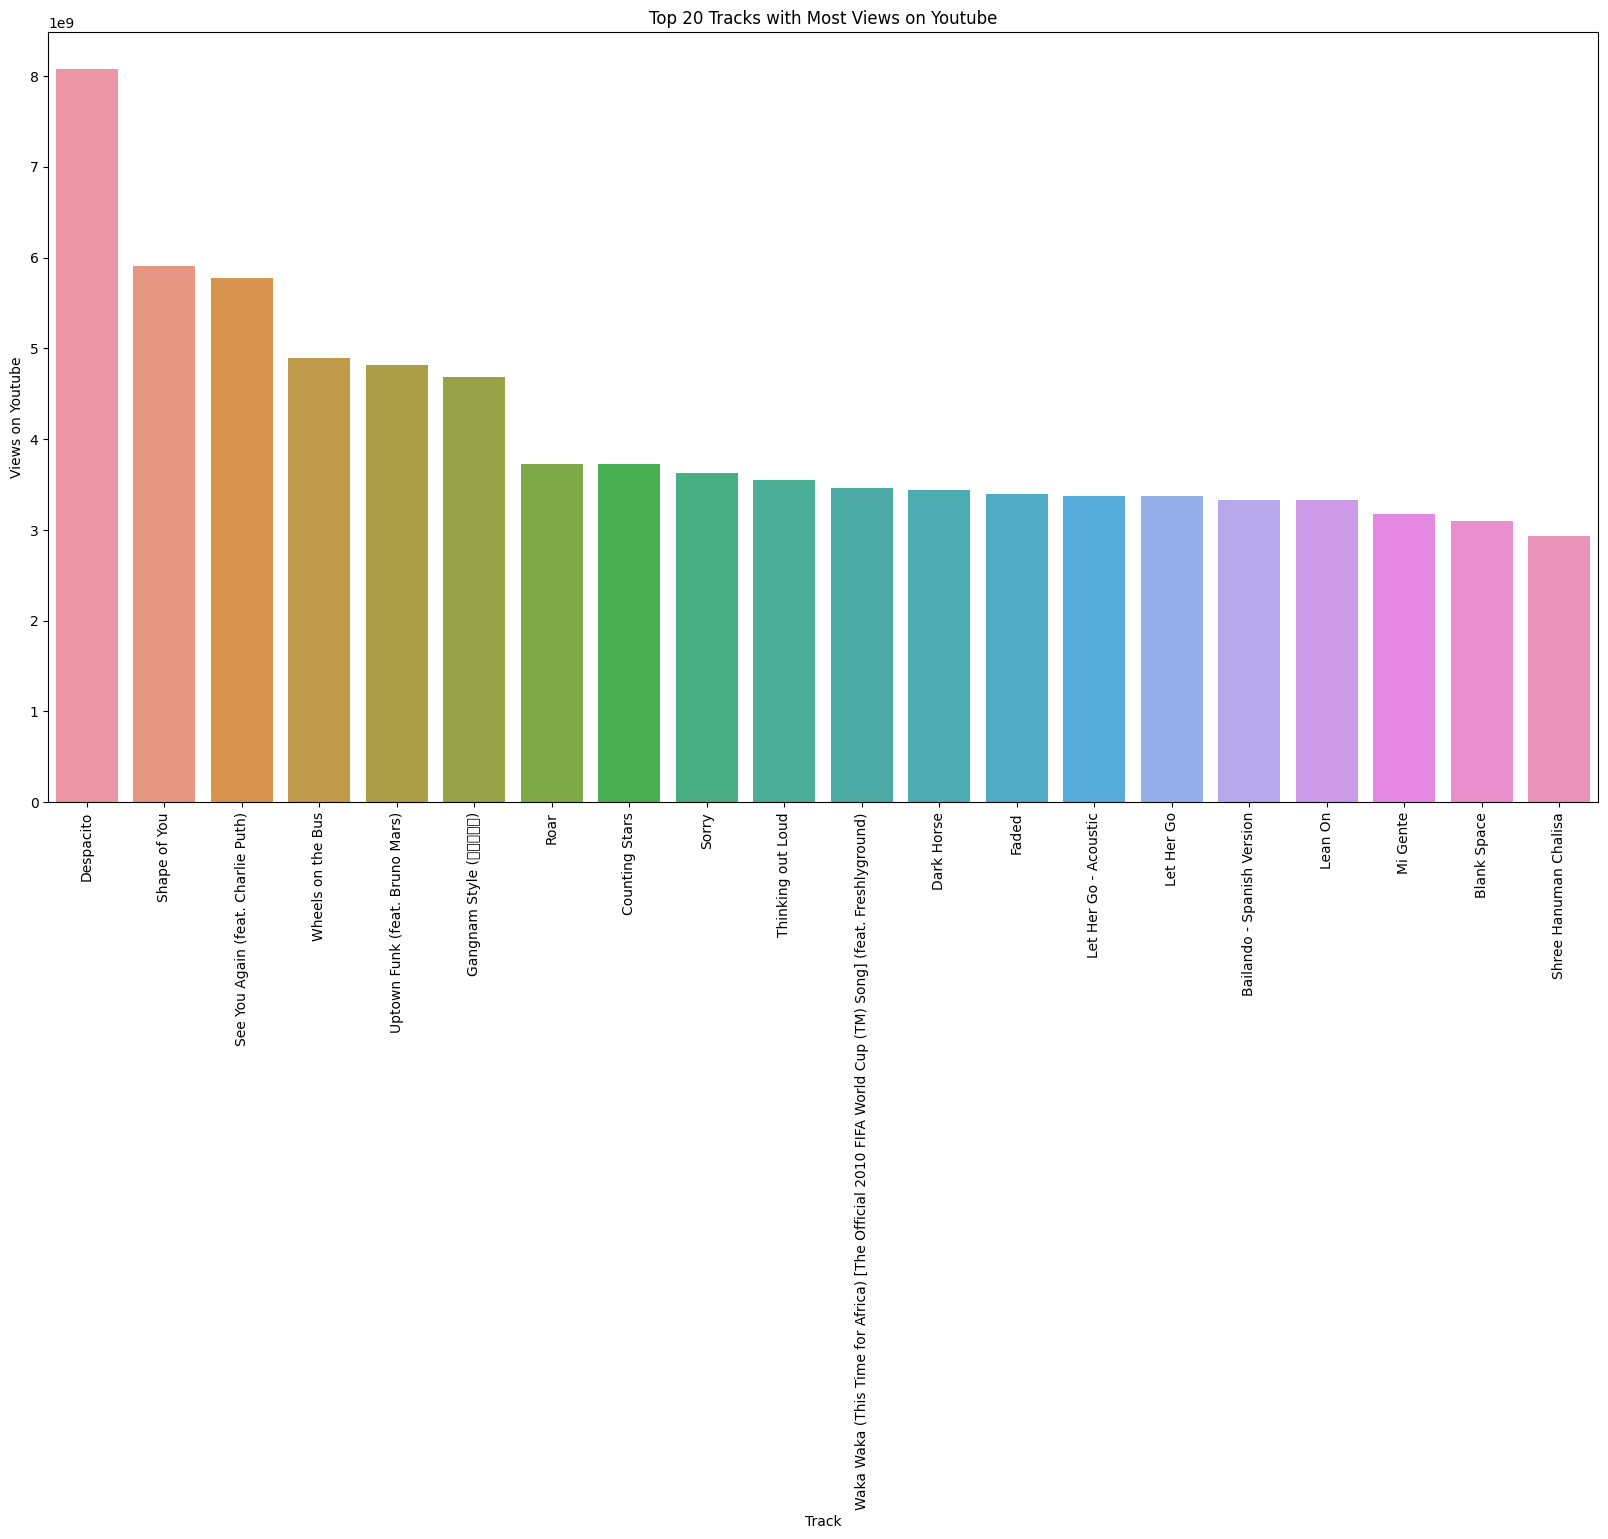

In [9]:
top_20_songs_on_youtube = df[['Track', 'Views']]
top_20_songs_on_youtube = top_20_songs_on_youtube.drop_duplicates(subset=['Track'], keep='first')

#top 20 tracks with most views
top_20_songs_on_youtube = top_20_songs_on_youtube.sort_values(by=['Views'], ascending=False)
top_20_songs_on_youtube = top_20_songs_on_youtube.head(20)

#plot the top 20 tracks with most views
plt.figure(figsize=(20,10))
sns.barplot(x='Track', y='Views', data = top_20_songs_on_youtube)
plt.xticks(rotation=90)
plt.ylabel('Views on Youtube')
plt.title('Top 20 Tracks with Most Views on Youtube')
plt.show()

<h2> Top Artists on Spotify </h2>

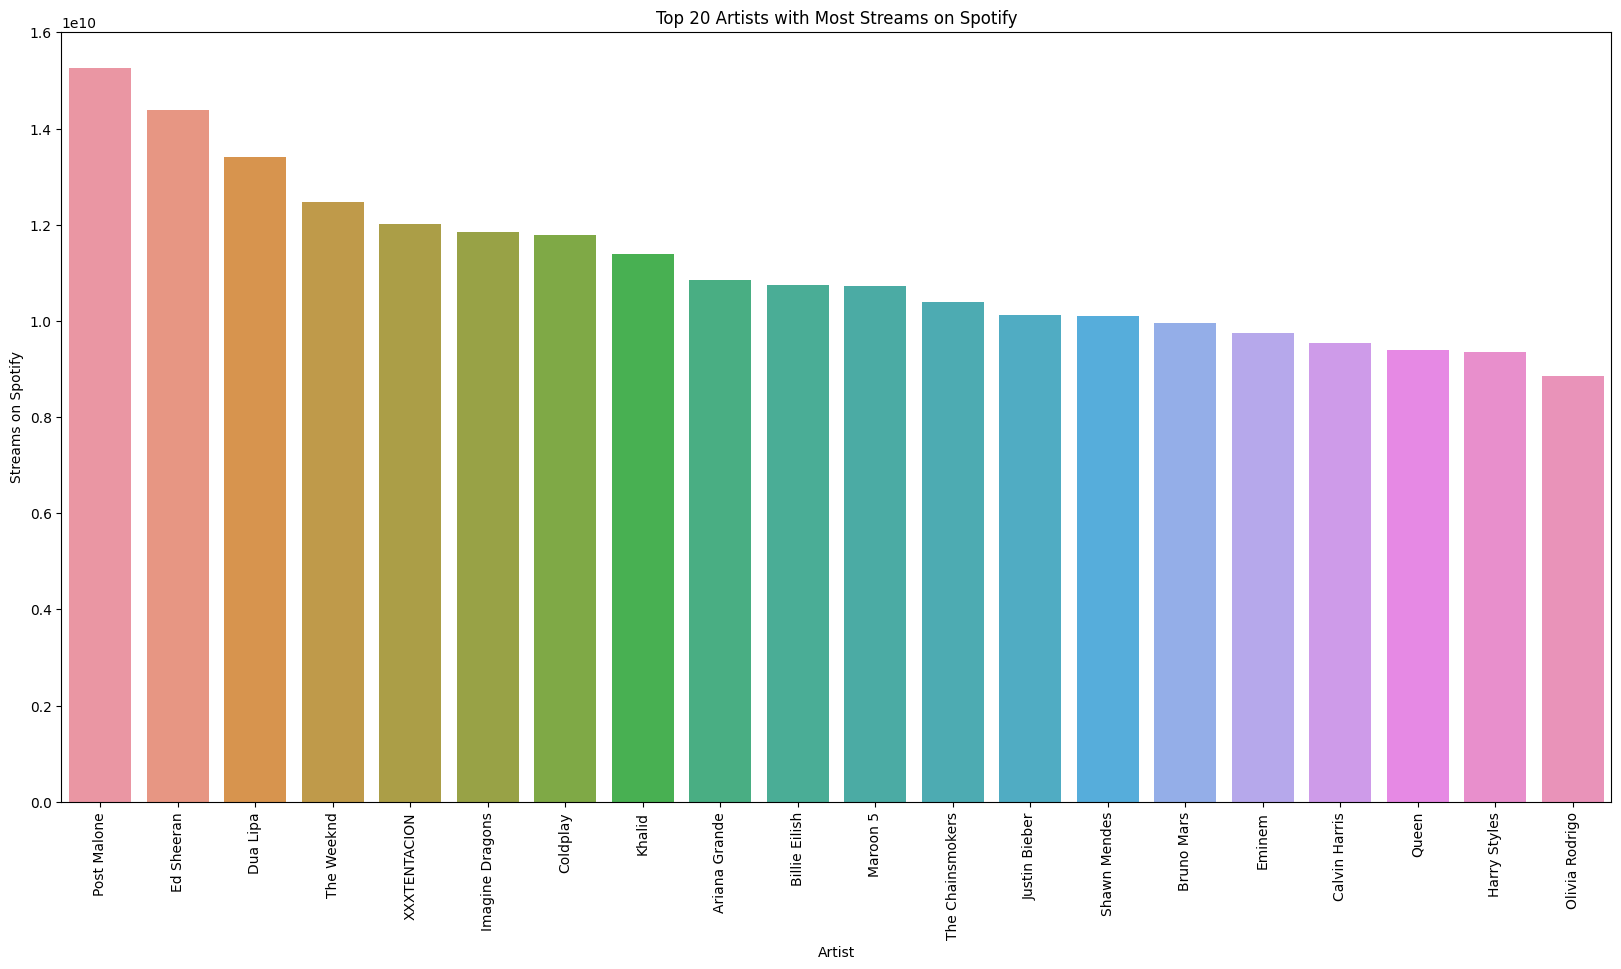

In [10]:
top_20_artists_on_spotify = df[['Artist', 'Stream']].groupby('Artist').sum()
top_20_artists_on_spotify = top_20_artists_on_spotify.sort_values(by=['Stream'], ascending=False)
top_20_artists_on_spotify = top_20_artists_on_spotify.head(20)

#plot the top 20 artists with most streams
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_artists_on_spotify.index, y='Stream', data = top_20_artists_on_spotify)
plt.xticks(rotation=90)
plt.ylabel('Streams on Spotify')
plt.title('Top 20 Artists with Most Streams on Spotify')
plt.show()


<h2> Top Artists on Youtube </h2>

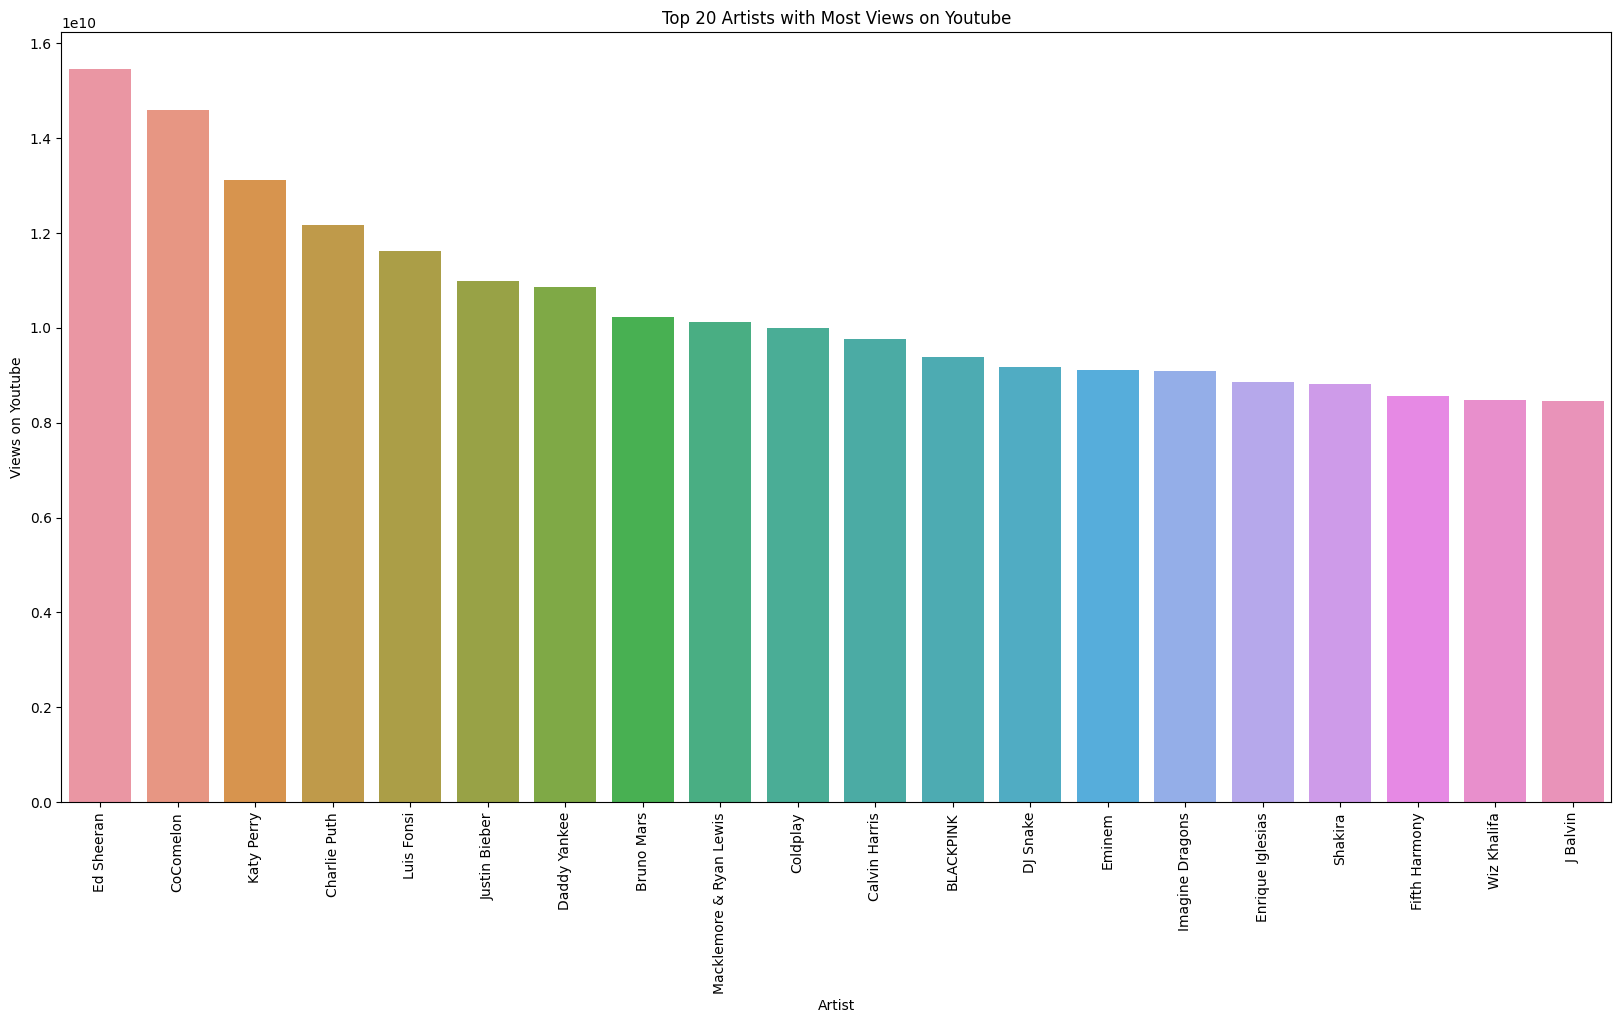

In [11]:
top_20_artists_on_youtube = df[['Artist', 'Views']].groupby('Artist').sum()
top_20_artists_on_youtube = top_20_artists_on_youtube.sort_values(by=['Views'], ascending=False)
top_20_artists_on_youtube = top_20_artists_on_youtube.head(20)

#plot the top 20 artists with most views
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_artists_on_youtube.index, y='Views', data = top_20_artists_on_youtube)
plt.xticks(rotation=90)
plt.ylabel('Views on Youtube')
plt.title('Top 20 Artists with Most Views on Youtube')
plt.show()

<h2> Top Albums on Spotify </h2>

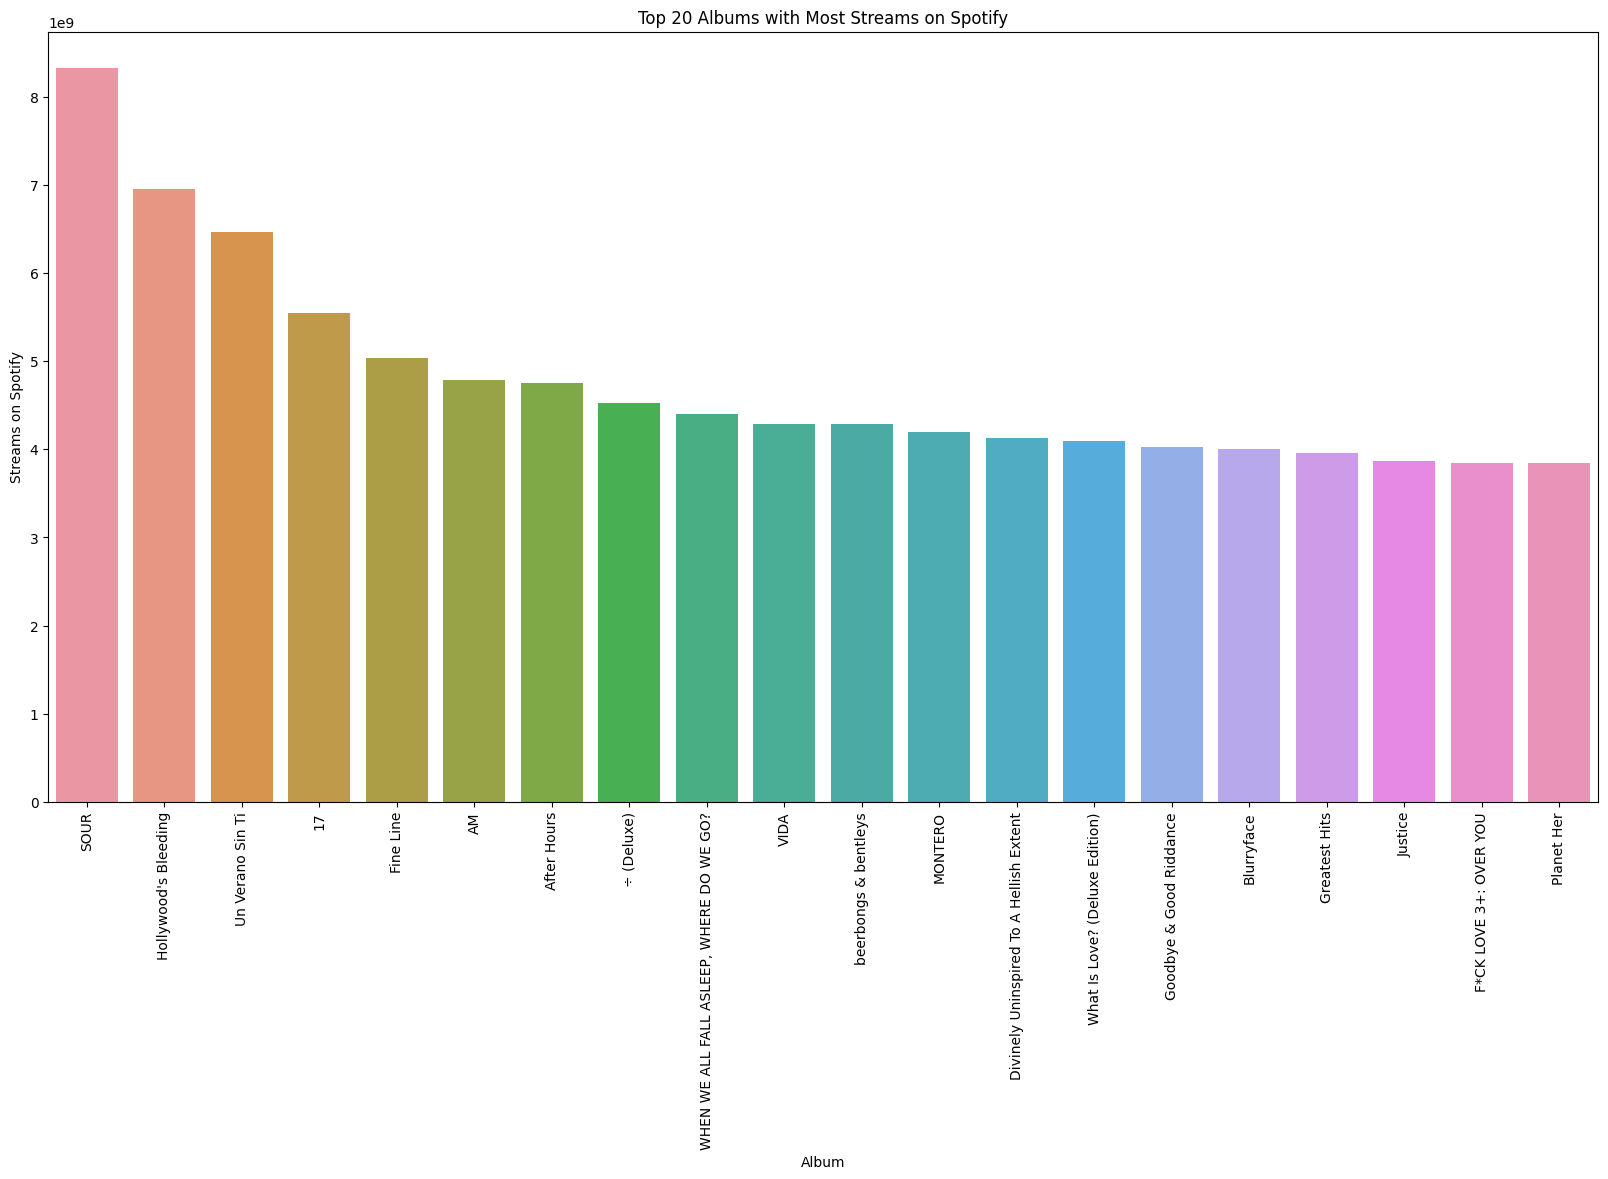

In [12]:
top_20_albums_on_spotify = df[['Track', 'Album', 'Stream']]
top_20_albums_on_spotify = top_20_albums_on_spotify.drop_duplicates(subset=['Track'], keep='first')
top_20_albums_on_spotify = top_20_albums_on_spotify.drop(['Track'], axis=1)

top_20_albums_on_spotify = top_20_albums_on_spotify.groupby('Album').sum()
top_20_albums_on_spotify = top_20_albums_on_spotify.sort_values(by=['Stream'], ascending=False)
top_20_albums_on_spotify = top_20_albums_on_spotify.head(20)

#plot the top 20 albums with most streams
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_albums_on_spotify.index, y='Stream', data = top_20_albums_on_spotify)
plt.xticks(rotation=90)
plt.ylabel('Streams on Spotify')
plt.title('Top 20 Albums with Most Streams on Spotify')
plt.show()


<h2> Top Albums on Youtube </h2>

C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE 

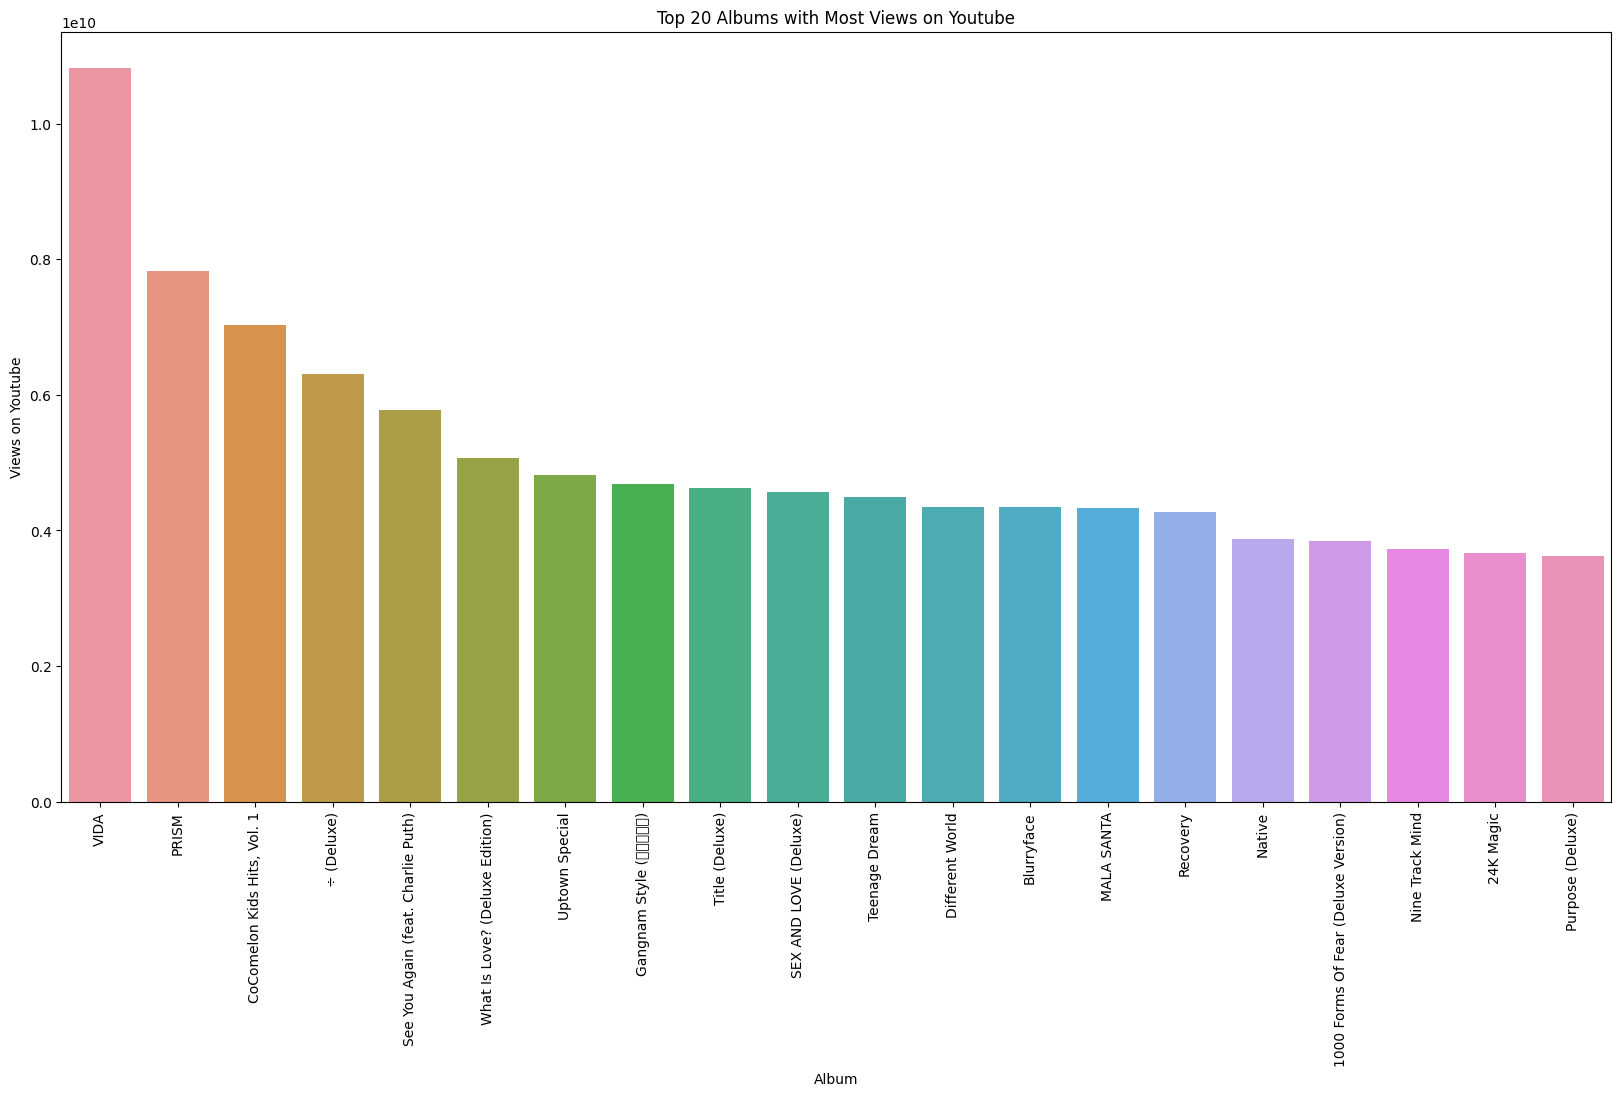

In [13]:
top_20_albums_on_youtube = df[['Track', 'Album', 'Views']]
top_20_albums_on_youtube = top_20_albums_on_youtube.drop_duplicates(subset=['Track'], keep='first')
top_20_albums_on_youtube = top_20_albums_on_youtube.drop(['Track'], axis=1)

top_20_albums_on_youtube = top_20_albums_on_youtube.groupby('Album').sum()
top_20_albums_on_youtube = top_20_albums_on_youtube.sort_values(by=['Views'], ascending=False)
top_20_albums_on_youtube = top_20_albums_on_youtube.head(20)

#plot the top 20 albums with most views
plt.figure(figsize=(20,10))
sns.barplot(x=top_20_albums_on_youtube.index, y='Views', data = top_20_albums_on_youtube)
plt.xticks(rotation=90)
plt.ylabel('Views on Youtube')
plt.title('Top 20 Albums with Most Views on Youtube')
plt.show()

<h2> Top Songs Overall (Spotify + Youtube) </h2>

C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Py

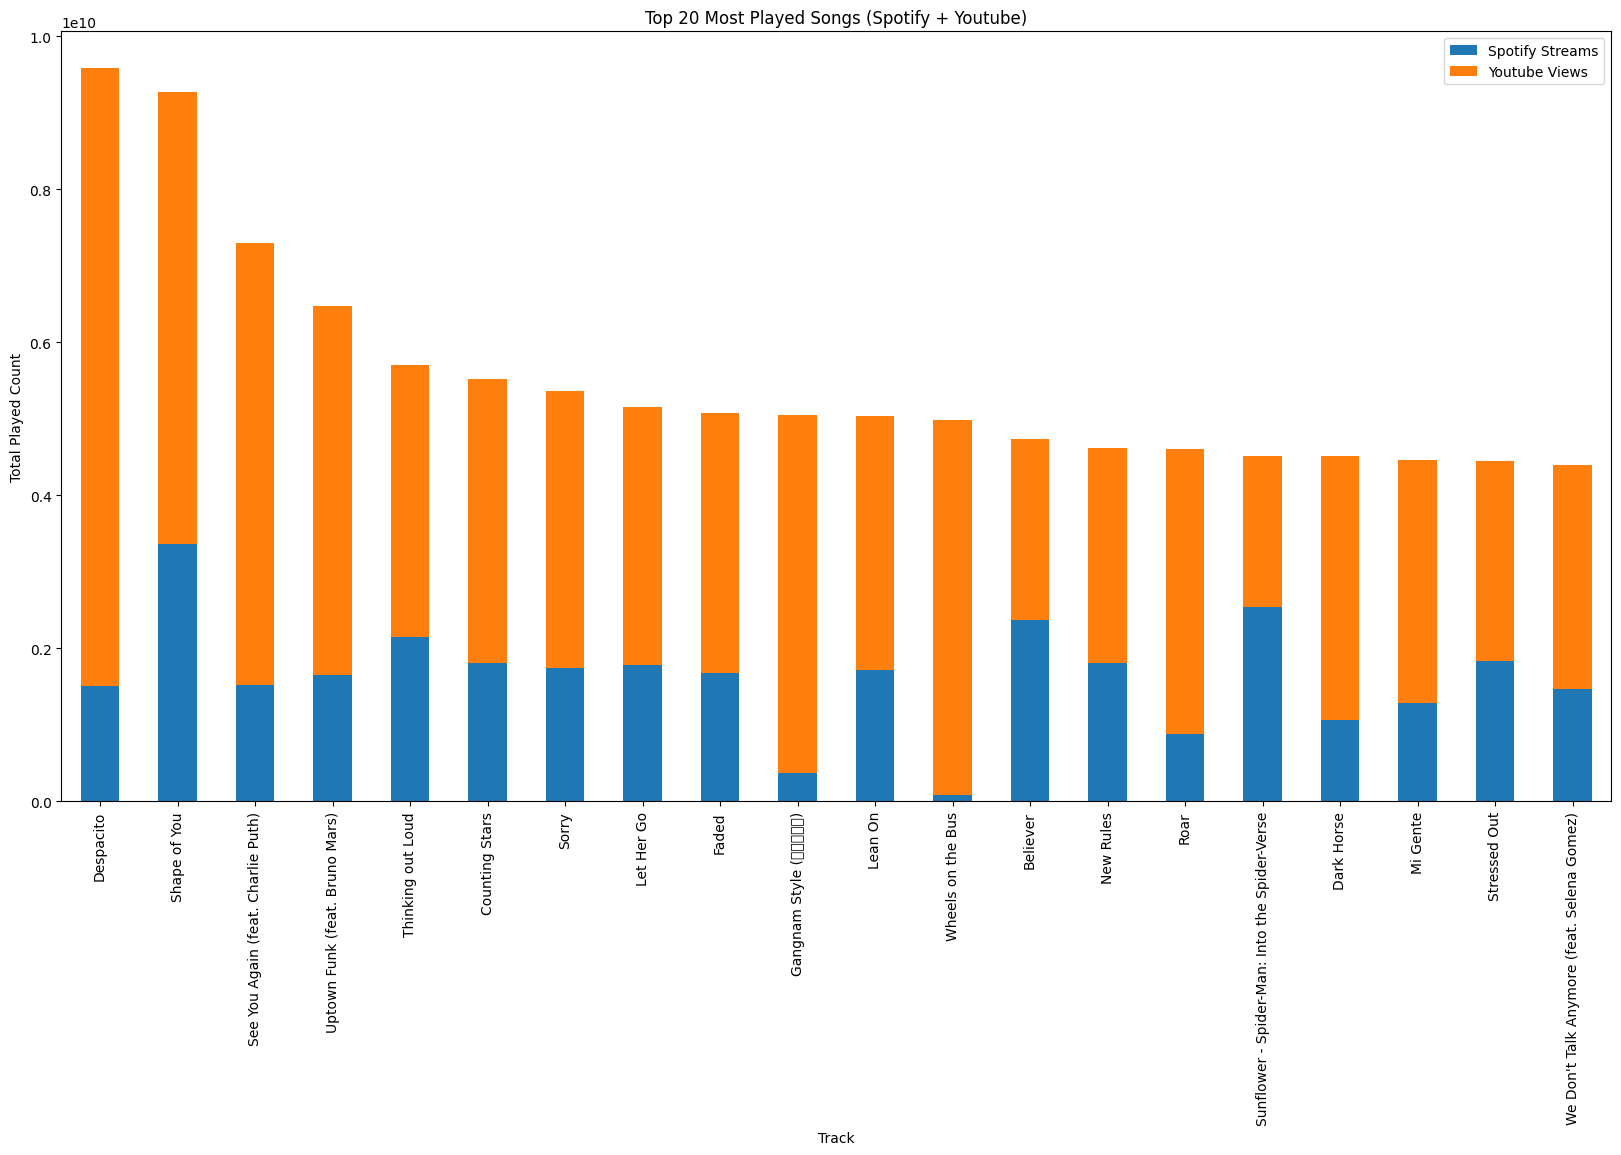

In [14]:
top_20_most_played_songs = df[['Track', 'Stream', 'Views']]

#delete rows with same track name
top_20_most_played_songs = top_20_most_played_songs.drop_duplicates(subset=['Track'], keep='first')

top_20_most_played_songs['total_played'] = top_20_most_played_songs['Stream'] + top_20_most_played_songs['Views']

#sort the top_20_most_played_songsframe by total_played and find the top 20 songs
top_20_most_played_songs = top_20_most_played_songs.sort_values(by=['total_played'], ascending=False)
top_20_most_played_songs = top_20_most_played_songs.head(20)

#create a stacked bar plot for the top 20 songs with x axis as track name and y axis as total_played 
top_20_most_played_songs.plot.bar(x='Track', y=['Stream', 'Views'], stacked=True, figsize=(20,10), title='Top 20 Most Played Songs (Spotify + Youtube)')
plt.ylabel('Total Played Count')
plt.legend(['Spotify Streams', 'Youtube Views'])


<h2> Top Artists Overall (Spotify + Youtube) </h2>

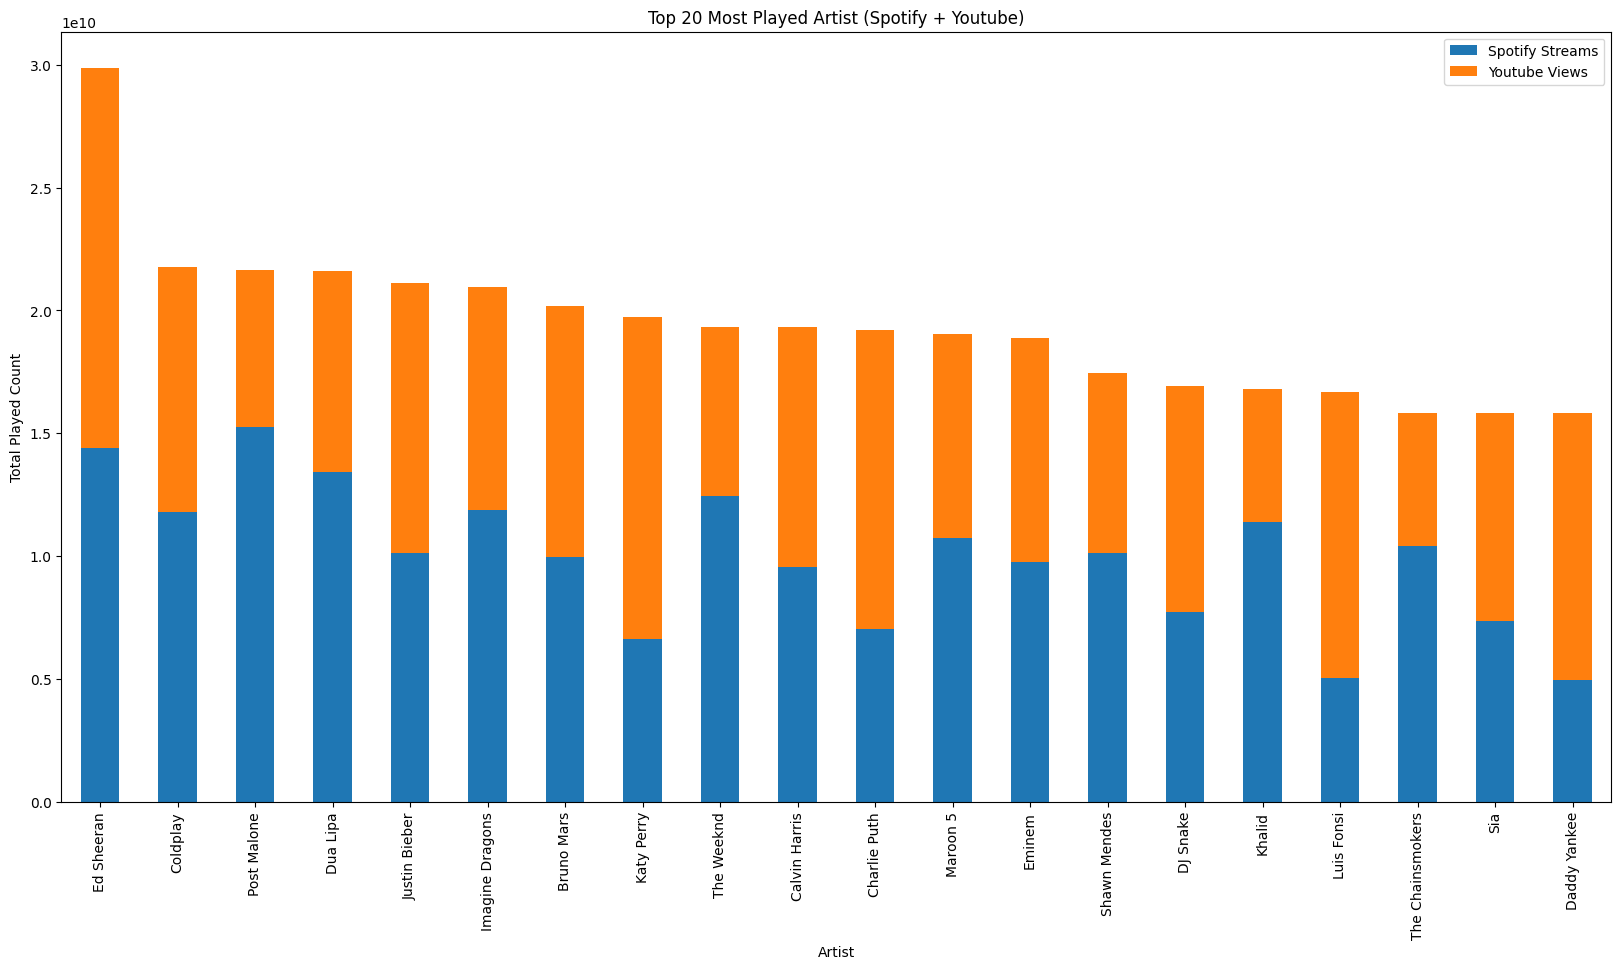

In [15]:
top_20_most_played_artists = df[['Artist', 'Stream', 'Views']].groupby('Artist').sum()
top_20_most_played_artists['total_played'] = top_20_most_played_artists['Stream'] + top_20_most_played_artists['Views']

#reset index to make Artist a column
top_20_most_played_artists = top_20_most_played_artists.reset_index()

top_20_most_played_artists = top_20_most_played_artists.sort_values(by=['total_played'], ascending=False)
top_20_most_played_artists = top_20_most_played_artists.head(20)

top_20_most_played_artists.plot.bar(x='Artist', y=['Stream', 'Views'], stacked=True, figsize=(20,10), title='Top 20 Most Played Artist (Spotify + Youtube)')
plt.ylabel('Total Played Count')
plt.legend(['Spotify Streams', 'Youtube Views'])


<h2> Top Singers in 50 Most Played Songs </h2>

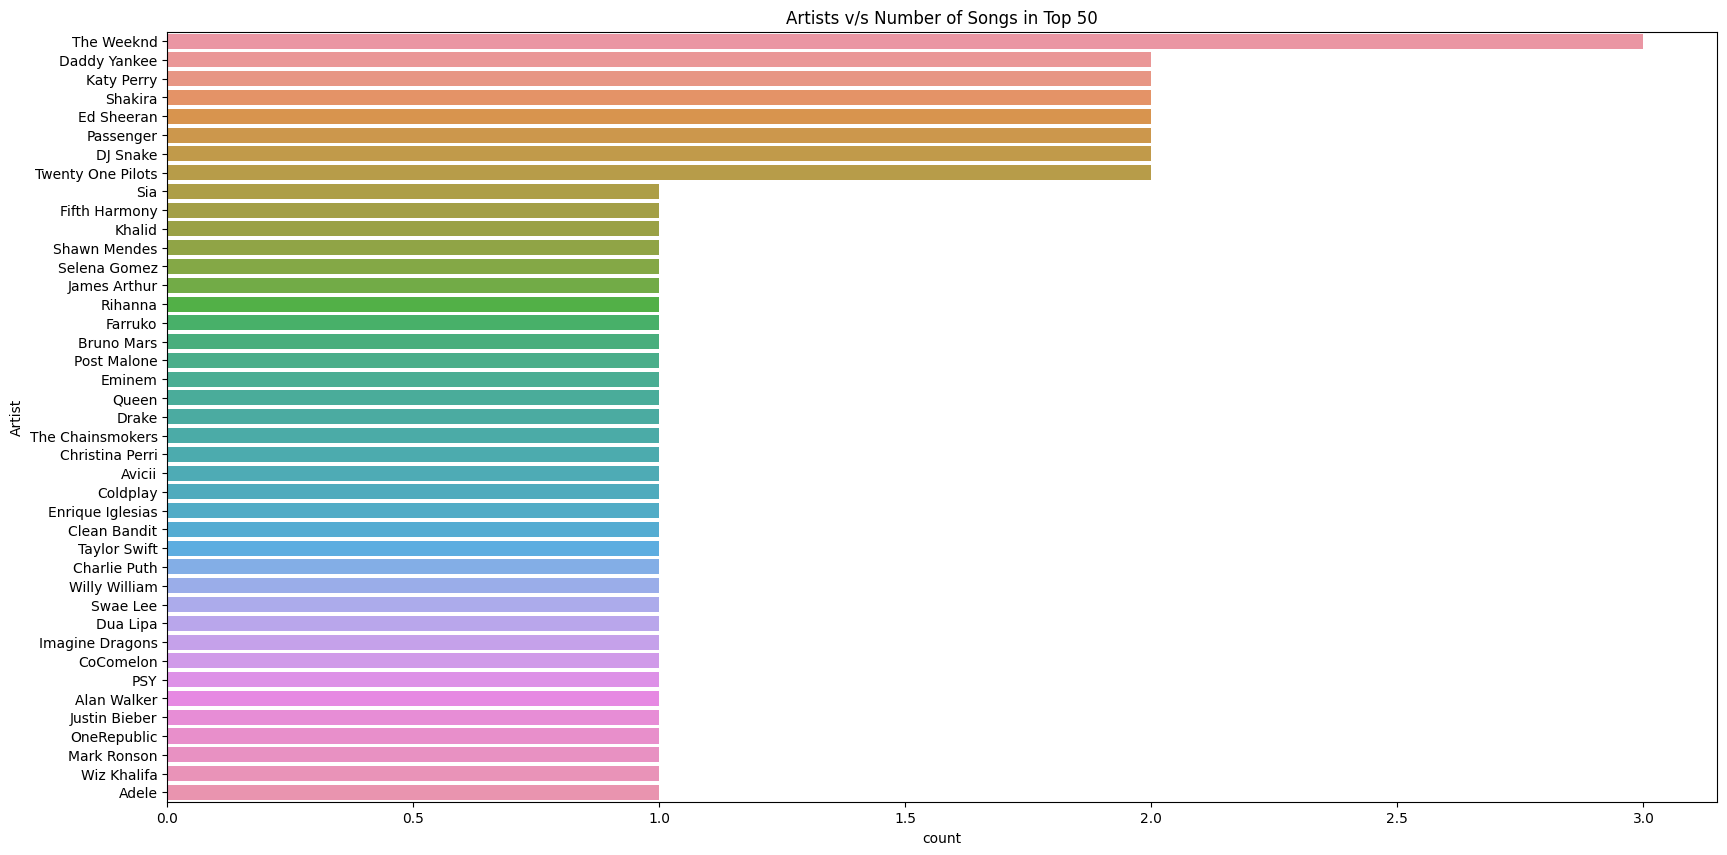

In [17]:
top_50_most_played_songs = df[['Track', 'Artist', 'Stream', 'Views']]
top_50_most_played_songs = top_50_most_played_songs.drop_duplicates(subset=['Track'], keep='first')
top_50_most_played_songs['total_played'] = top_50_most_played_songs['Stream'] + top_50_most_played_songs['Views']
top_50_most_played_songs.sort_values(by=['total_played'], ascending=False, inplace=True)
top_50_most_played_songs = top_50_most_played_songs.head(50)

plt.figure(figsize=(20,10))
sns.countplot(y='Artist', data=top_50_most_played_songs, order=top_50_most_played_songs['Artist'].value_counts().index)
plt.title('Artists v/s Number of Songs in Top 50')
plt.show()



<h2> Top Songs by Likes to Views Ratio </h2>

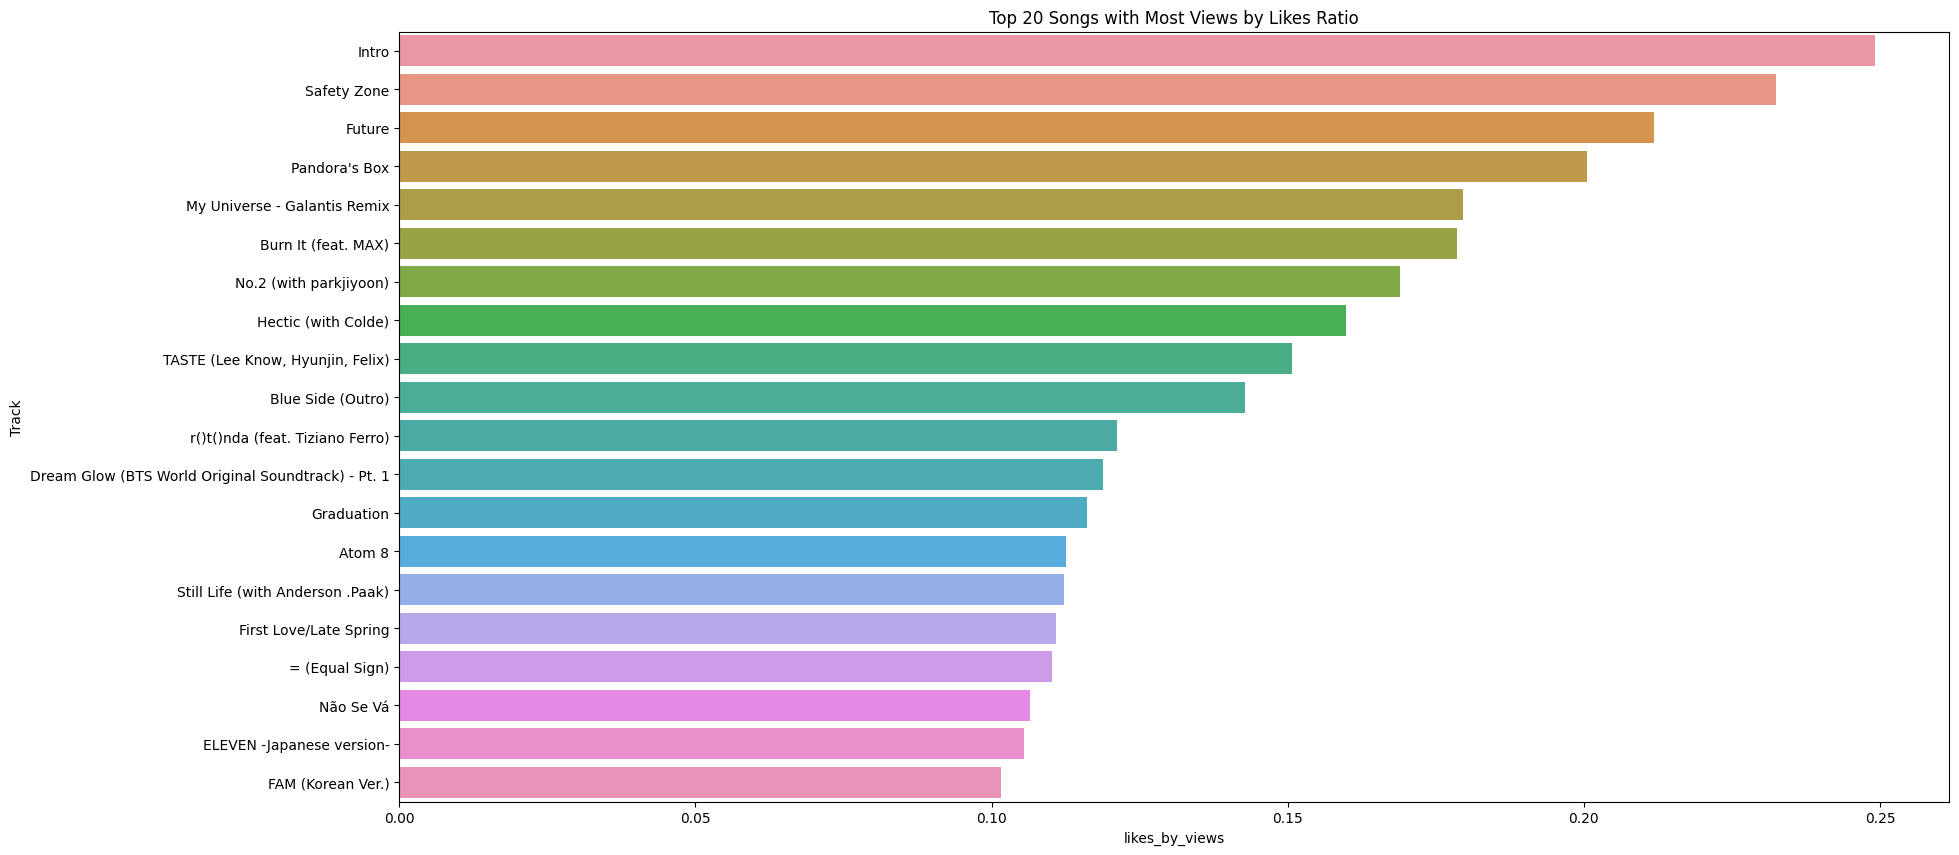

In [18]:
top_20_likes_by_views = df[['Track', 'Views', 'Likes']]
top_20_likes_by_views = top_20_likes_by_views.drop_duplicates(subset=['Track'], keep='first')
top_20_likes_by_views['likes_by_views'] = top_20_likes_by_views['Likes'] / top_20_likes_by_views['Views']
top_20_likes_by_views.sort_values(by=['likes_by_views'], ascending=False, inplace=True)
top_20_likes_by_views = top_20_likes_by_views.head(20)

plt.figure(figsize=(20,10))
sns.barplot(x=top_20_likes_by_views['likes_by_views'], y=top_20_likes_by_views['Track'], data=top_20_likes_by_views)
plt.title('Top 20 Songs with Most Views by Likes Ratio')
plt.show()

<h2> Energy, Speechiness and Acousticness of Top 20 Most Played Songs </h2>

C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Py

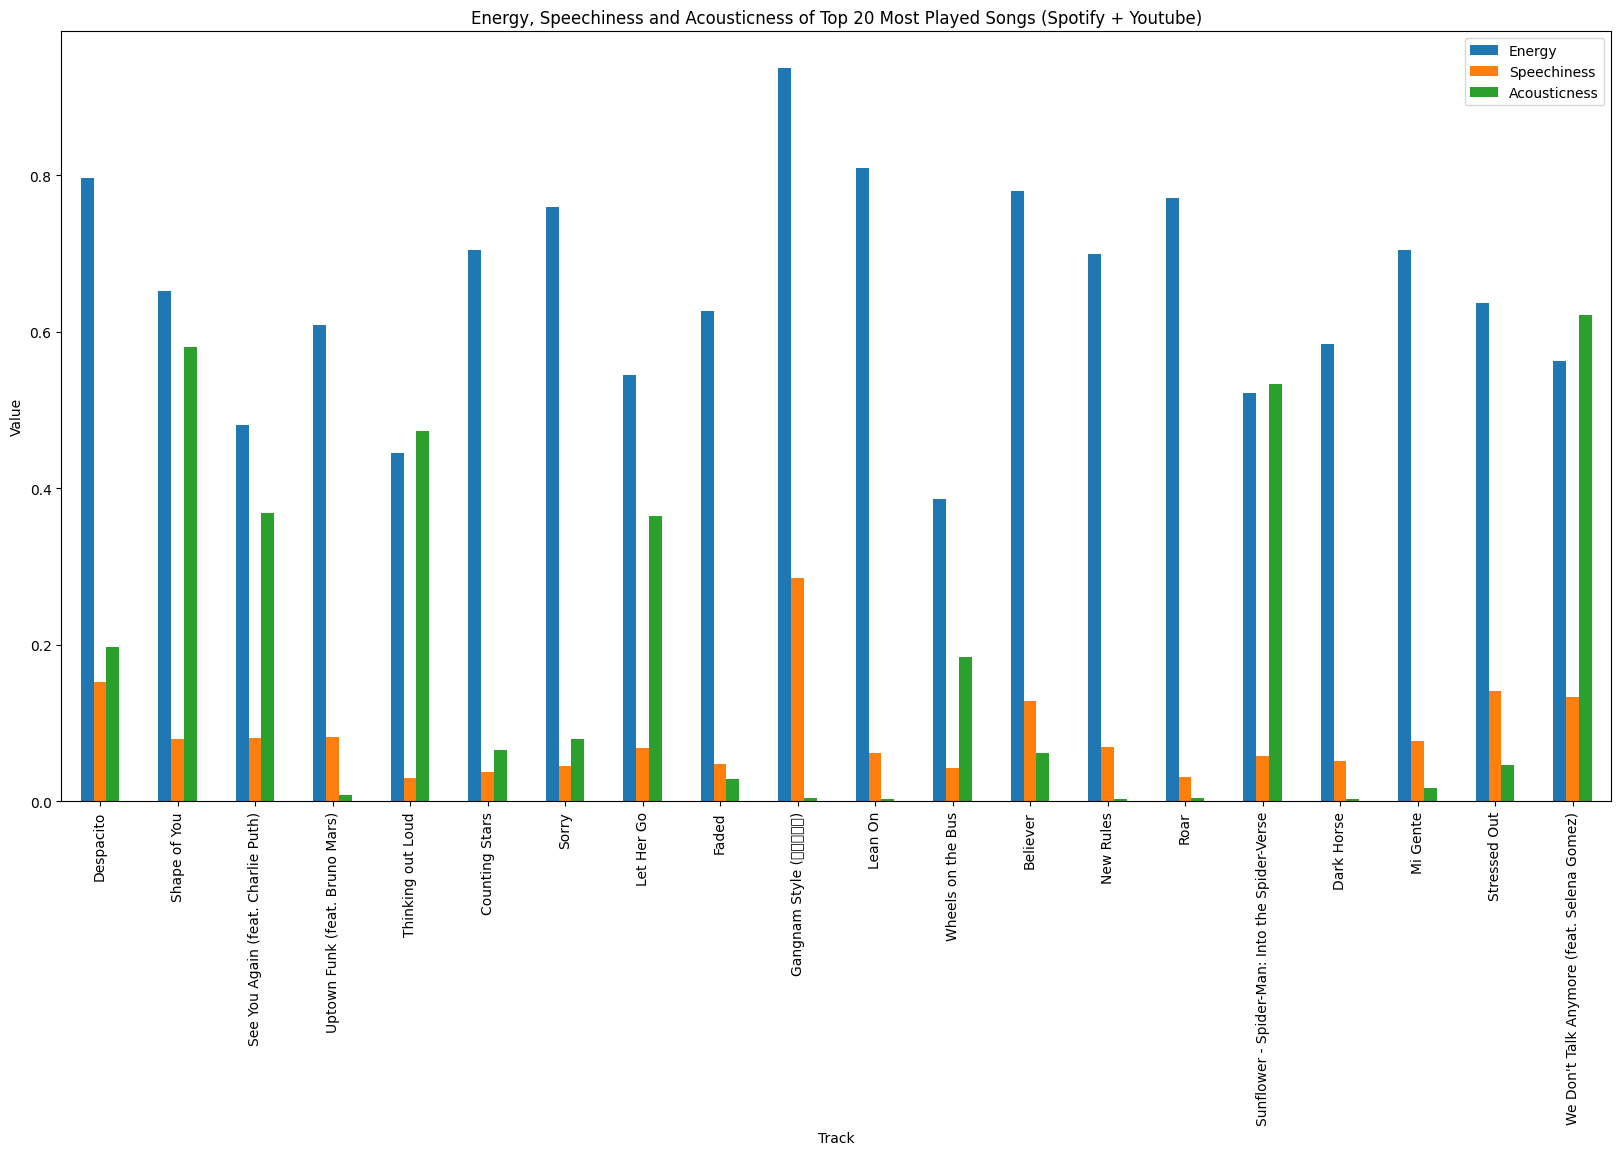

In [19]:
top_20_most_played_songs = df[['Track', 'Stream', 'Views', 'Energy', 'Speechiness', 'Acousticness', 'Valence', 'Danceability']]

top_20_most_played_songs = top_20_most_played_songs.drop_duplicates(subset=['Track'], keep='first')

top_20_most_played_songs['total_played'] = top_20_most_played_songs['Stream'] + top_20_most_played_songs['Views']

top_20_most_played_songs = top_20_most_played_songs.drop(['Stream', 'Views'], axis=1)

#sort the top_20_most_played_songsframe by total_played and find the top 20 songs
top_20_most_played_songs = top_20_most_played_songs.sort_values(by=['total_played'], ascending=False)
top_20_most_played_songs = top_20_most_played_songs.head(20)

top_20_most_played_songs.plot.bar(x='Track', y=['Energy', 'Speechiness', 'Acousticness'], figsize=(20,10), title='Energy, Speechiness and Acousticness of Top 20 Most Played Songs (Spotify + Youtube)')
plt.ylabel('Value')
plt.legend(['Energy', 'Speechiness', 'Acousticness'])


<h2>Energy, Speechiness and Acousticness of Top 20 Most Played Artists</h2>

C:\Users\Archit\AppData\Local\Temp\ipykernel_8776\2297475110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_most_played_artists['total_played'] = top_20_most_played_artists['Stream'] + top_20_most_played_artists['Views']


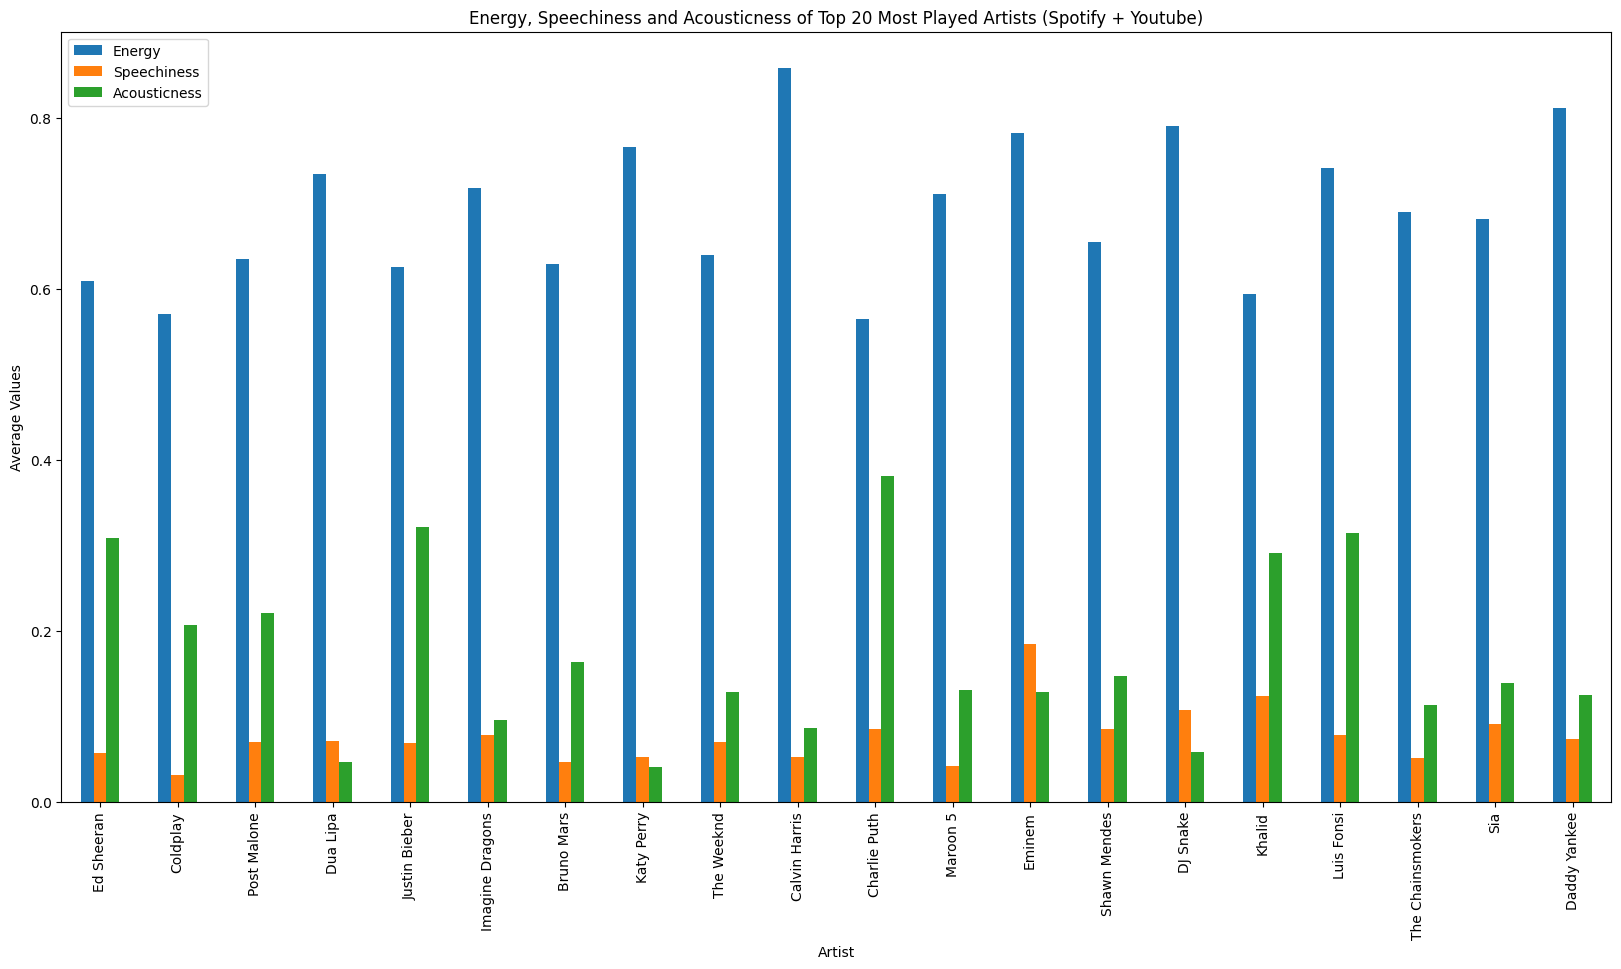

In [50]:
top_20_most_played_artists = df[['Artist', 'Stream', 'Views', 'Energy', 'Speechiness', 'Acousticness', 'Valence', 'Danceability']]
top_20_most_played_artists['total_played'] = top_20_most_played_artists['Stream'] + top_20_most_played_artists['Views']
top_20_most_played_artists = top_20_most_played_artists.drop(['Stream', 'Views'], axis=1)

#groupby artist and sum the total_played and mean of energy, speechiness and acousticness
top_20_most_played_artists = top_20_most_played_artists.groupby('Artist').agg({'total_played': 'sum', 'Valence': 'mean', 'Danceability': 'mean', 'Energy': 'mean', 'Speechiness': 'mean', 'Acousticness': 'mean'})
top_20_most_played_artists = top_20_most_played_artists.sort_values(by=['total_played'], ascending=False)
top_20_most_played_artists = top_20_most_played_artists.head(20)
top_20_most_played_artists = top_20_most_played_artists.reset_index()
top_20_most_played_artists.plot.bar(x='Artist', y=['Energy', 'Speechiness', 'Acousticness'], figsize=(20,10), title='Energy, Speechiness and Acousticness of Top 20 Most Played Artists (Spotify + Youtube)')
plt.ylabel('Average Values')
plt.legend(['Energy', 'Speechiness', 'Acousticness'])

plt.legend(loc='upper left')


<h2>Valence and Danceability of Top 20 Most Played Songs</h2>

C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\Archit\AppData\Roaming\Python\Py

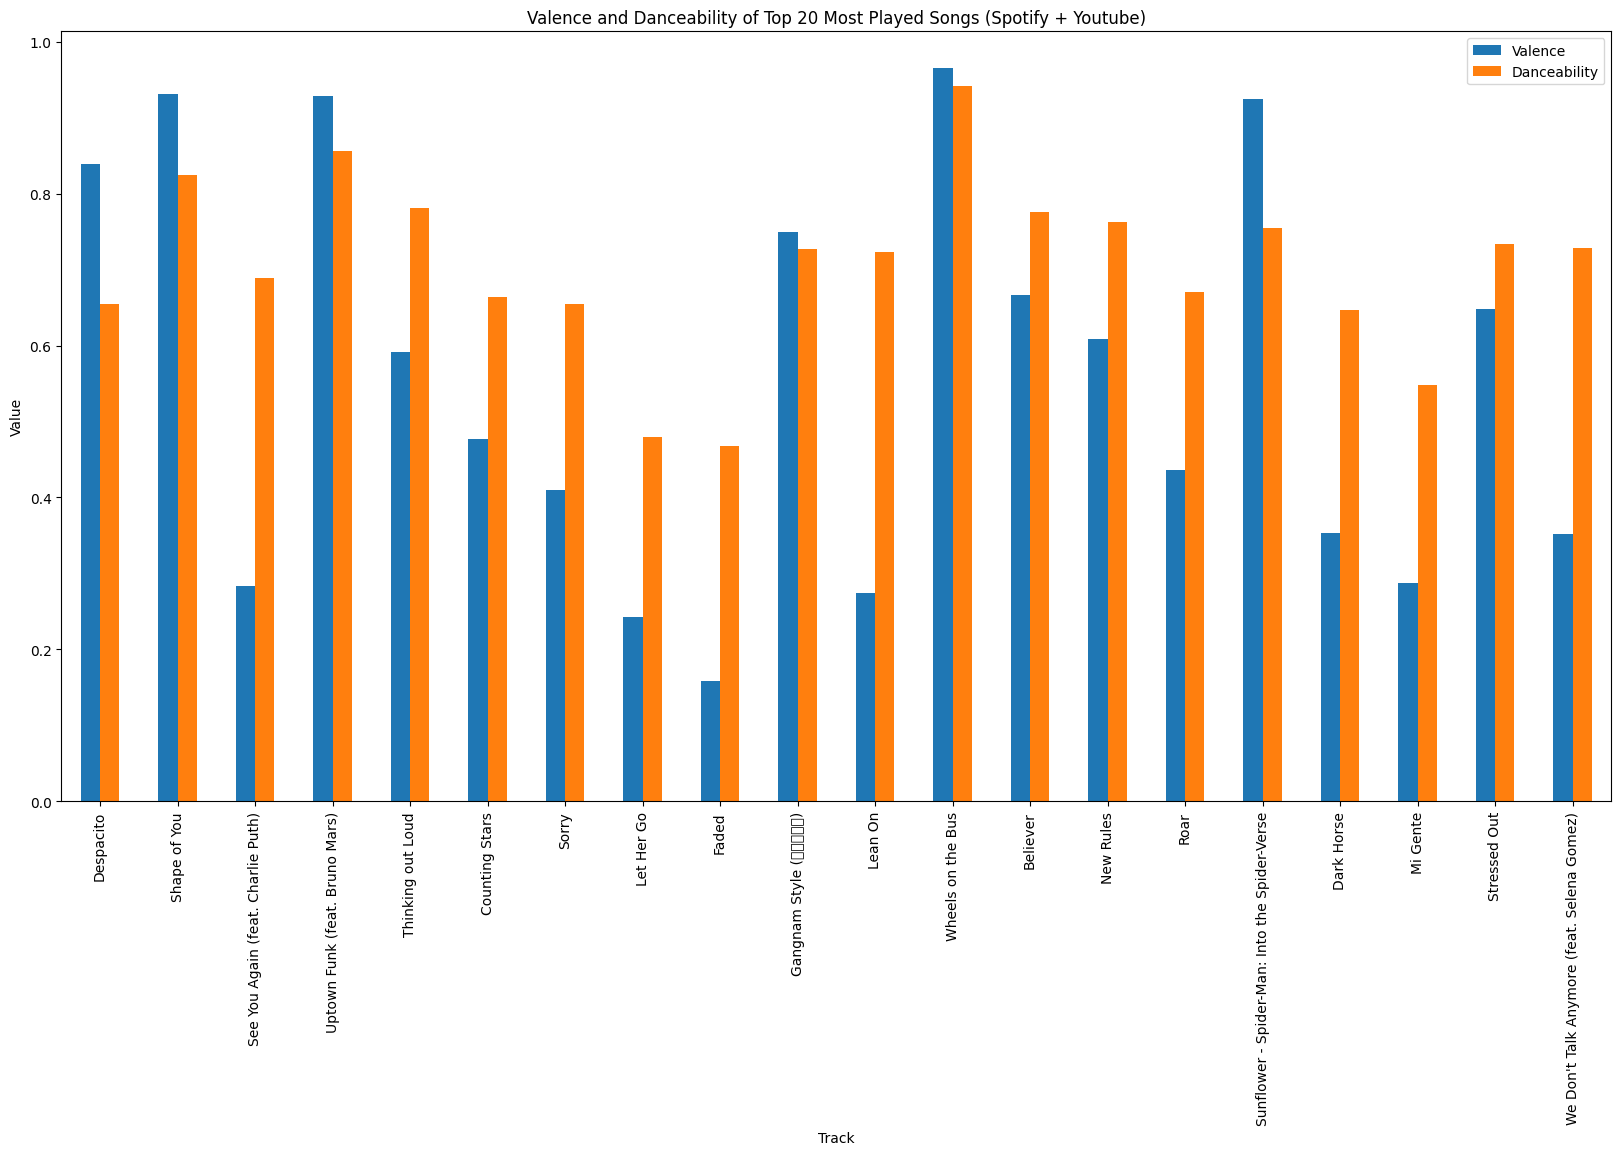

In [21]:
top_20_most_played_songs.plot.bar(x='Track', y=['Valence', 'Danceability'], figsize=(20,10), title='Valence and Danceability of Top 20 Most Played Songs (Spotify + Youtube)')
plt.ylabel('Value')
plt.legend(['Valence', 'Danceability'])

<h2> Valence and Danceability of Top 20 Most Played Artists</h2> 

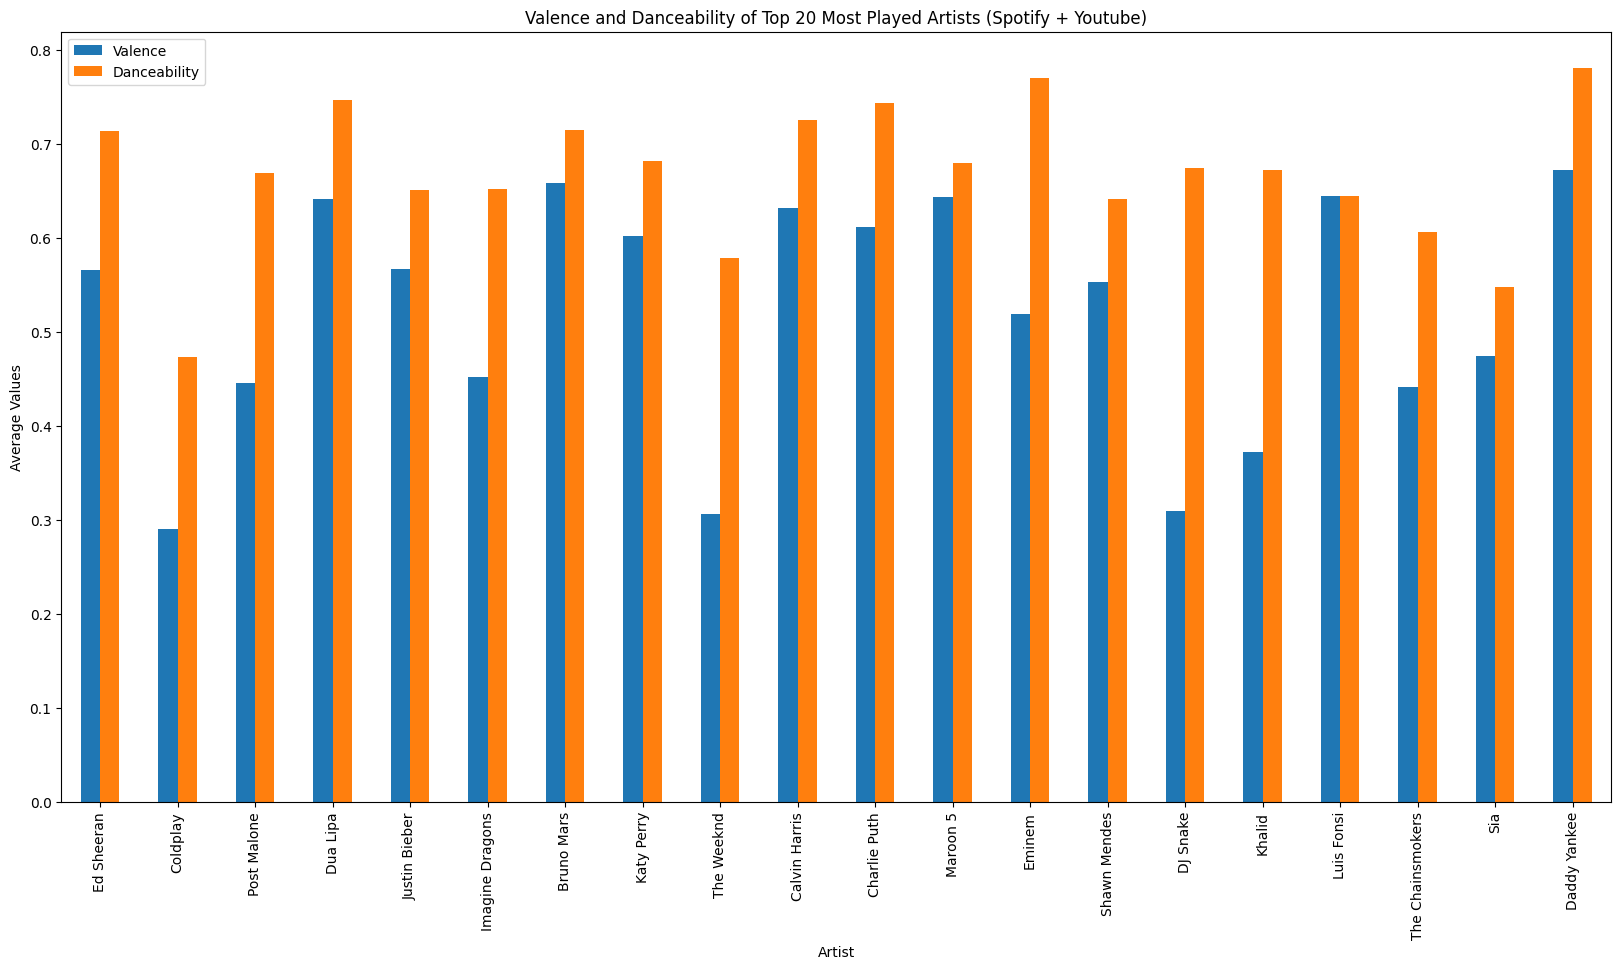

In [22]:
top_20_most_played_artists.plot.bar(x='Artist', y=['Valence', 'Danceability'], figsize=(20,10), title='Valence and Danceability of Top 20 Most Played Artists (Spotify + Youtube)')
plt.ylabel('Average Values')
plt.legend(['Valence', 'Danceability'])

<h2>Distribution of Different Parameters on the Entire Dataset</h2>

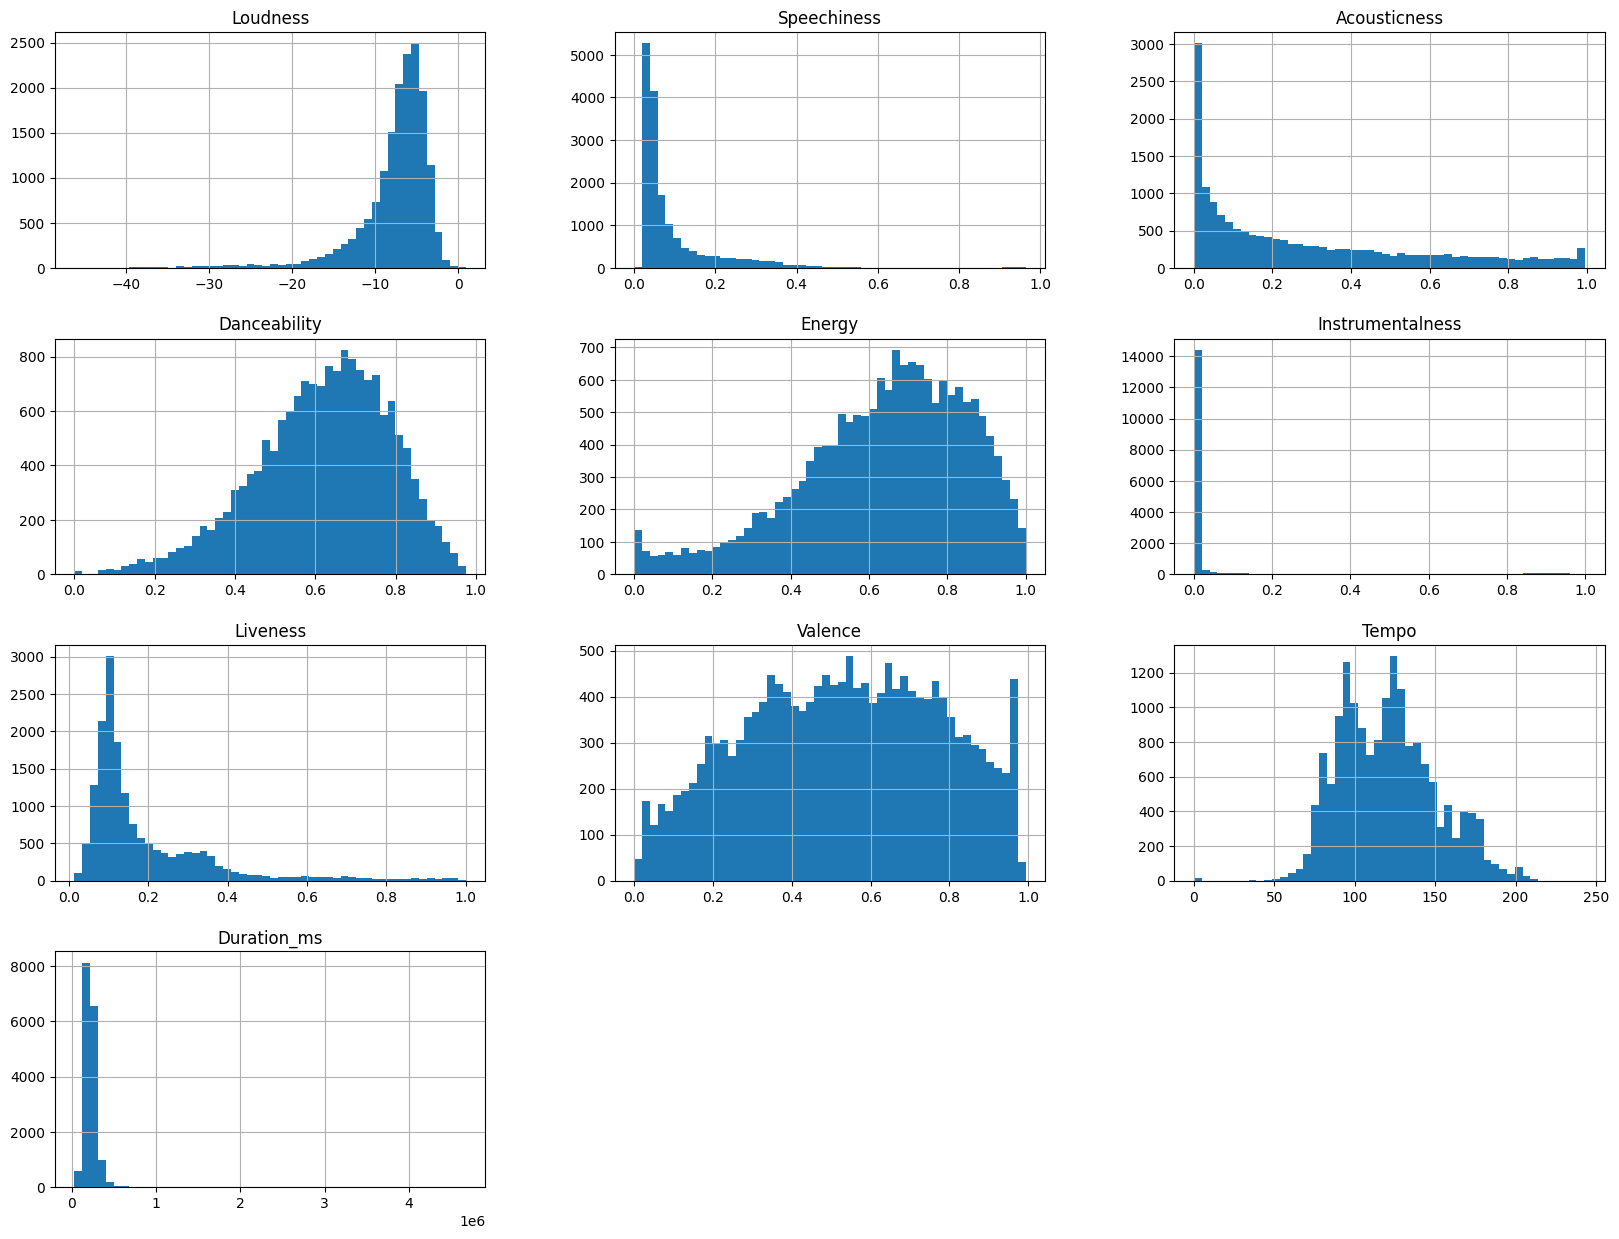

In [23]:
df1 = df[['Track', 'Loudness', 'Speechiness', 'Acousticness', 'Danceability', 'Energy', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Duration_ms']]
df1 = df1.drop_duplicates(subset=['Track'], keep='first')
df1 = df1.drop(['Track'], axis=1)

#plot a histogram for each numeric column
df1.hist(bins=50, figsize=(20,15))
plt.show()


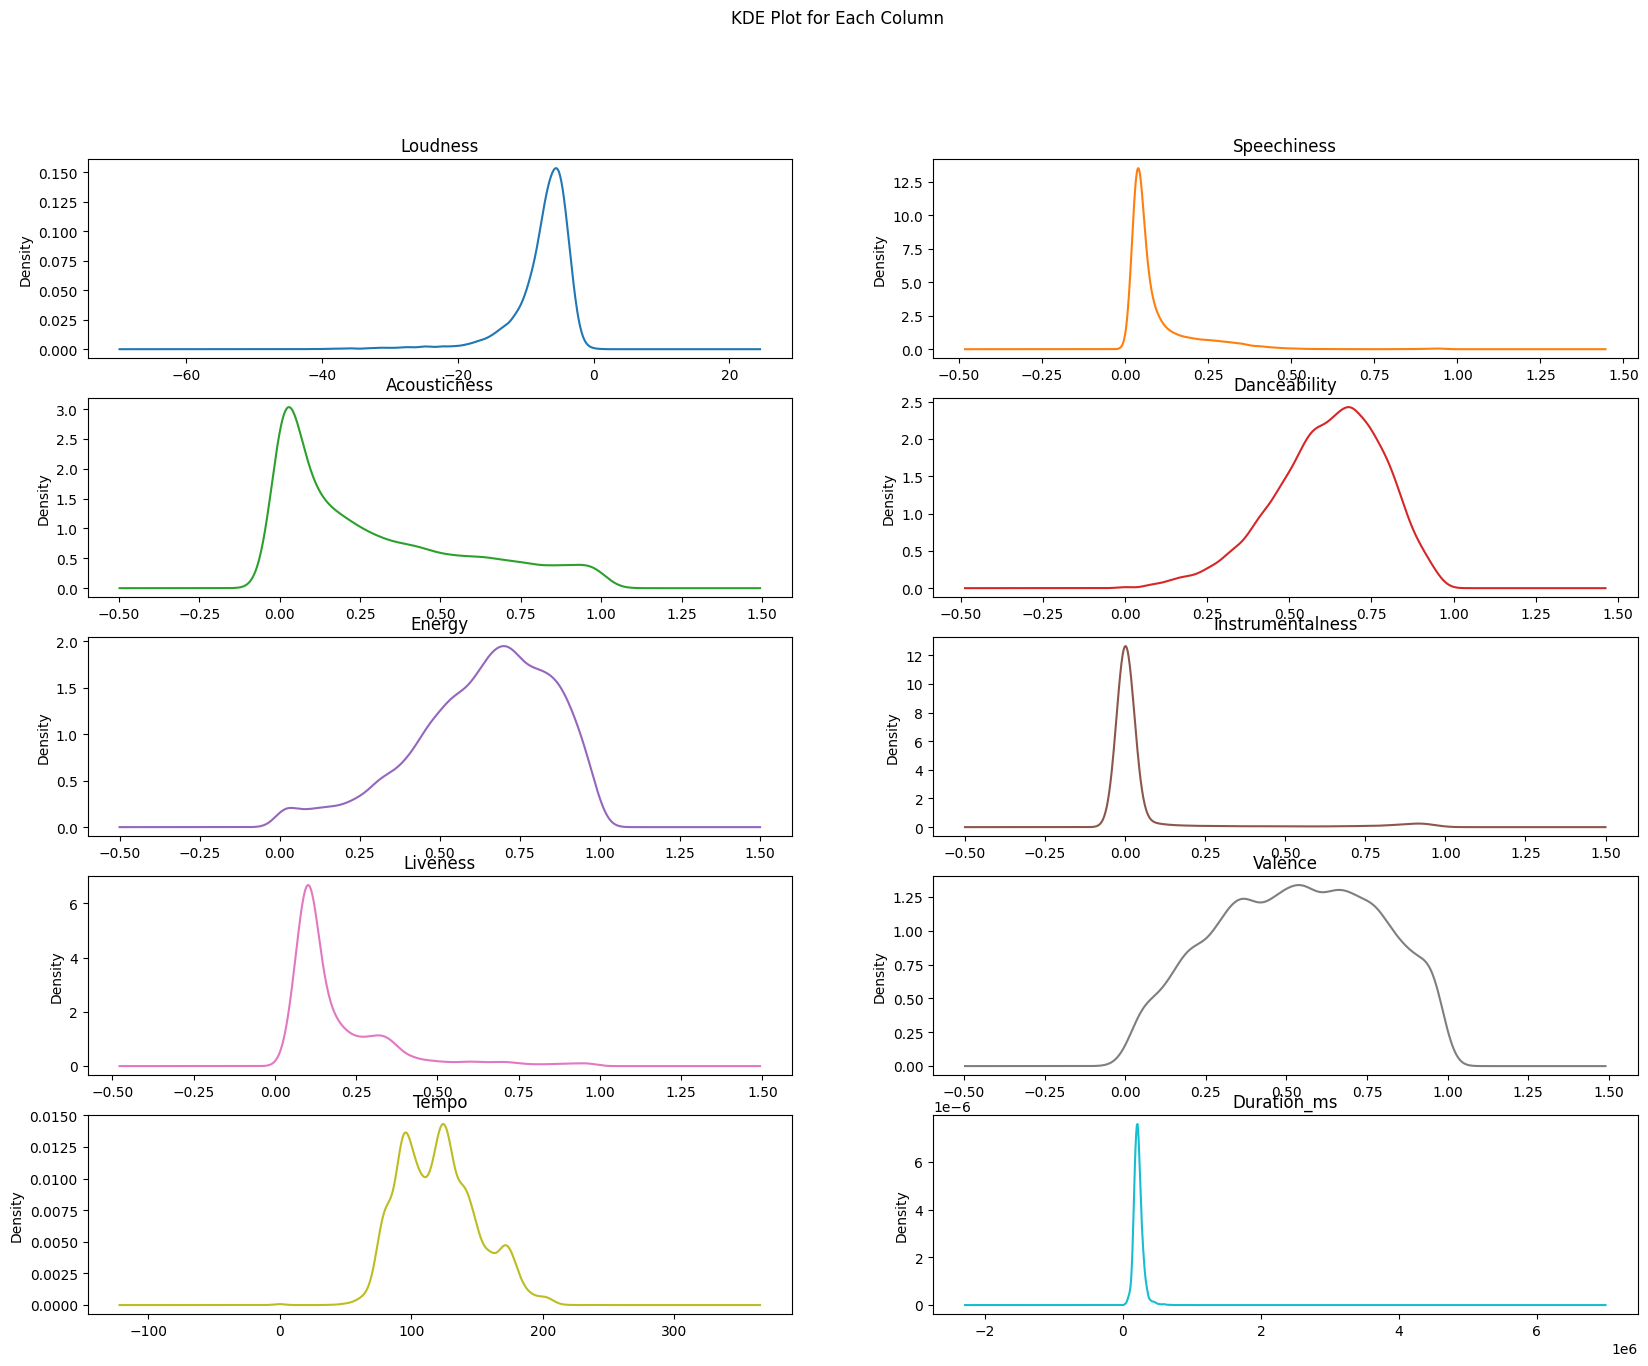

In [24]:
df1.plot.kde(subplots=True, layout=(5,2), figsize=(20,15), sharex=False, legend=False, title='KDE Plot for Each Column')
for i, ax in enumerate(plt.gcf().axes):
    ax.set_title(df1.columns[i])

plt.show()


<h2>Scatter Plots Between Different Parameters to Understand the Correlation Between Them</h2>

<Axes: title={'center': 'Likes vs Comments'}, xlabel='Likes', ylabel='Comments'>

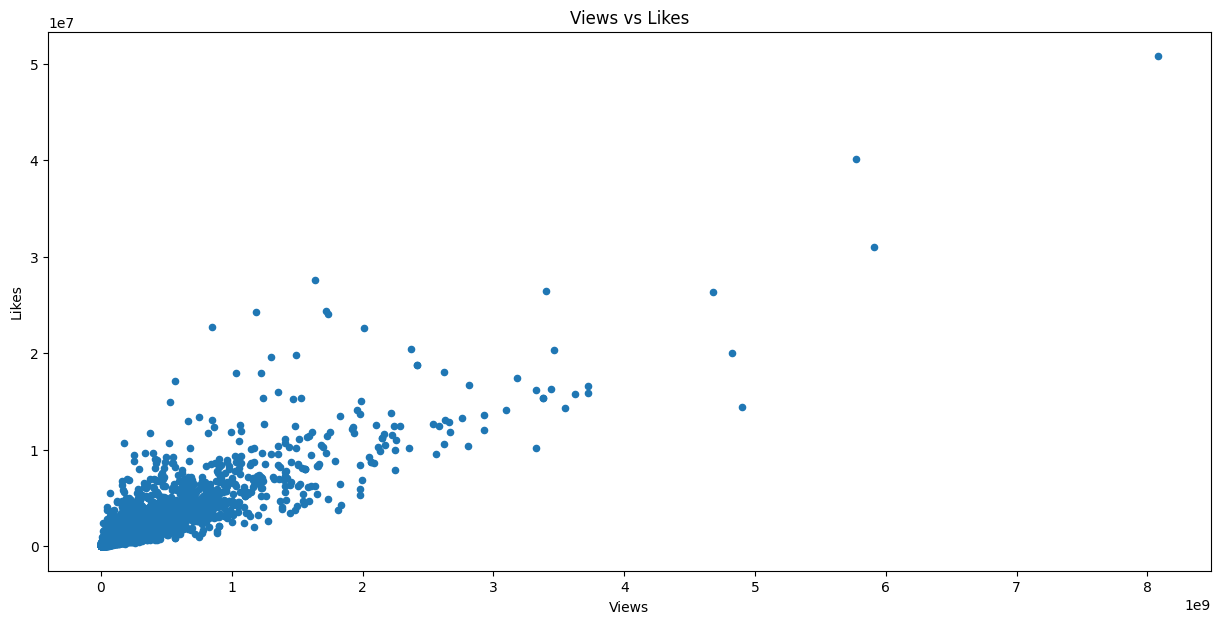

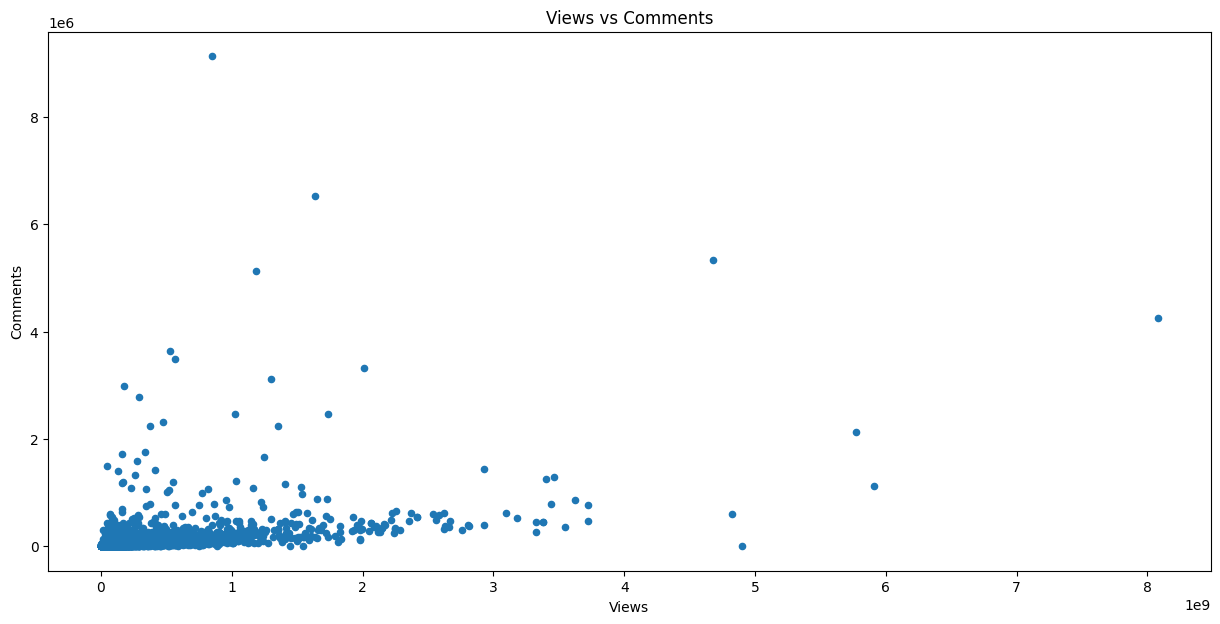

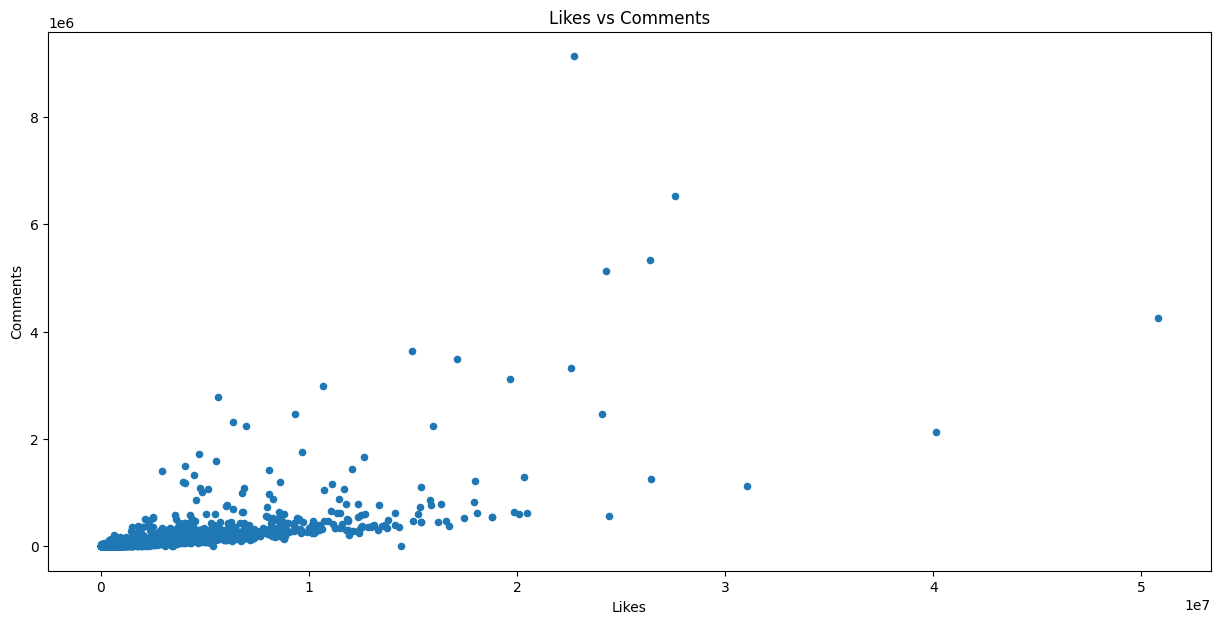

In [25]:
df2 = df[['Track', 'Views', 'Likes', 'Comments']]
df2 = df2.drop_duplicates(subset=['Track'], keep='first')
df2 = df2.drop(['Track'], axis=1)

#plot three scatter plots for views, likes and comments

df2.plot.scatter(x='Views', y='Likes', figsize=(15,7), title='Views vs Likes')

df2.plot.scatter(x='Views', y='Comments', figsize=(15,7), title='Views vs Comments')
df2.plot.scatter(x='Likes', y='Comments', figsize=(15,7), title='Likes vs Comments')




<Axes: title={'center': 'Views vs Streams'}, xlabel='Views', ylabel='Stream'>

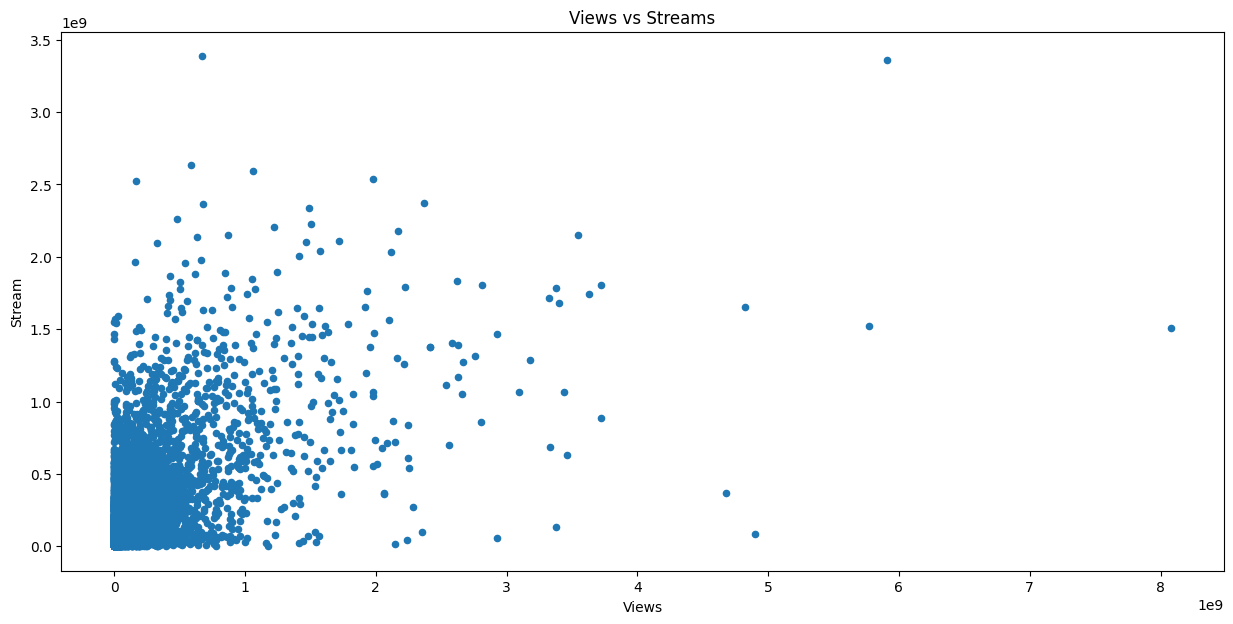

In [26]:
df3 = df[['Track', 'Stream', 'Views']]
df3 = df3.drop_duplicates(subset=['Track'], keep='first')

#plot a scatter plot for views and streams
df3.plot.scatter(x='Views', y='Stream', figsize=(15,7), title='Views vs Streams')

<h2>Pie Charts to Represent Different Distributions</h2>

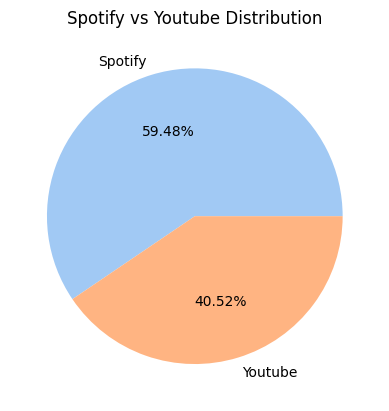

In [27]:
df4 = df[['Track', 'Stream', 'Views']]
df4 = df4.drop_duplicates(subset=['Track'], keep='first')

total_streams = df4['Stream'].sum()
total_views = df4['Views'].sum()

colors = sns.color_palette('pastel')[0:5]
label= ['Spotify', 'Youtube']

plt.pie([total_streams, total_views], labels=label,colors = colors, autopct='%.2f%%')
#add title
plt.title('Spotify vs Youtube Distribution')
plt.show()



<Axes: title={'center': 'Album Type Distribution'}, ylabel='Album_type'>

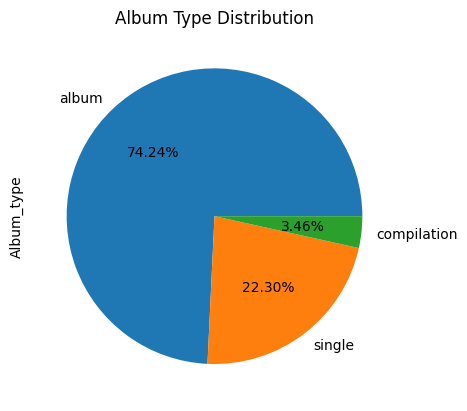

In [28]:
df4 = df[['Track', 'Album_type']]
df4 = df4.drop_duplicates(subset=['Track'], keep='first')
df4 = df4.drop(['Track'], axis=1)

#plot a pie chart for album type
df4['Album_type'].value_counts().plot.pie(autopct='%.2f%%', title='Album Type Distribution')



<Axes: title={'center': 'Official Video (Youtube) Distribution'}, ylabel='official_video'>

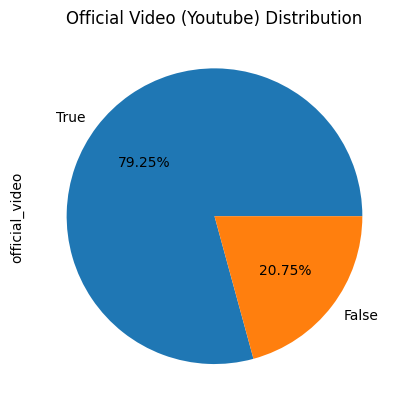

In [48]:
df5 = df[['Track', 'official_video']]
df5 = df5.drop_duplicates(subset=['Track'], keep='first')
df5 = df5.drop(['Track'], axis=1)

#plot a pie chart for official video
df5['official_video'].value_counts().plot.pie(autopct='%.2f%%', title='Official Video (Youtube) Distribution')


<h2>Finding Correlation Between Different Music Parameters and Total Times the Song is Played</h2>

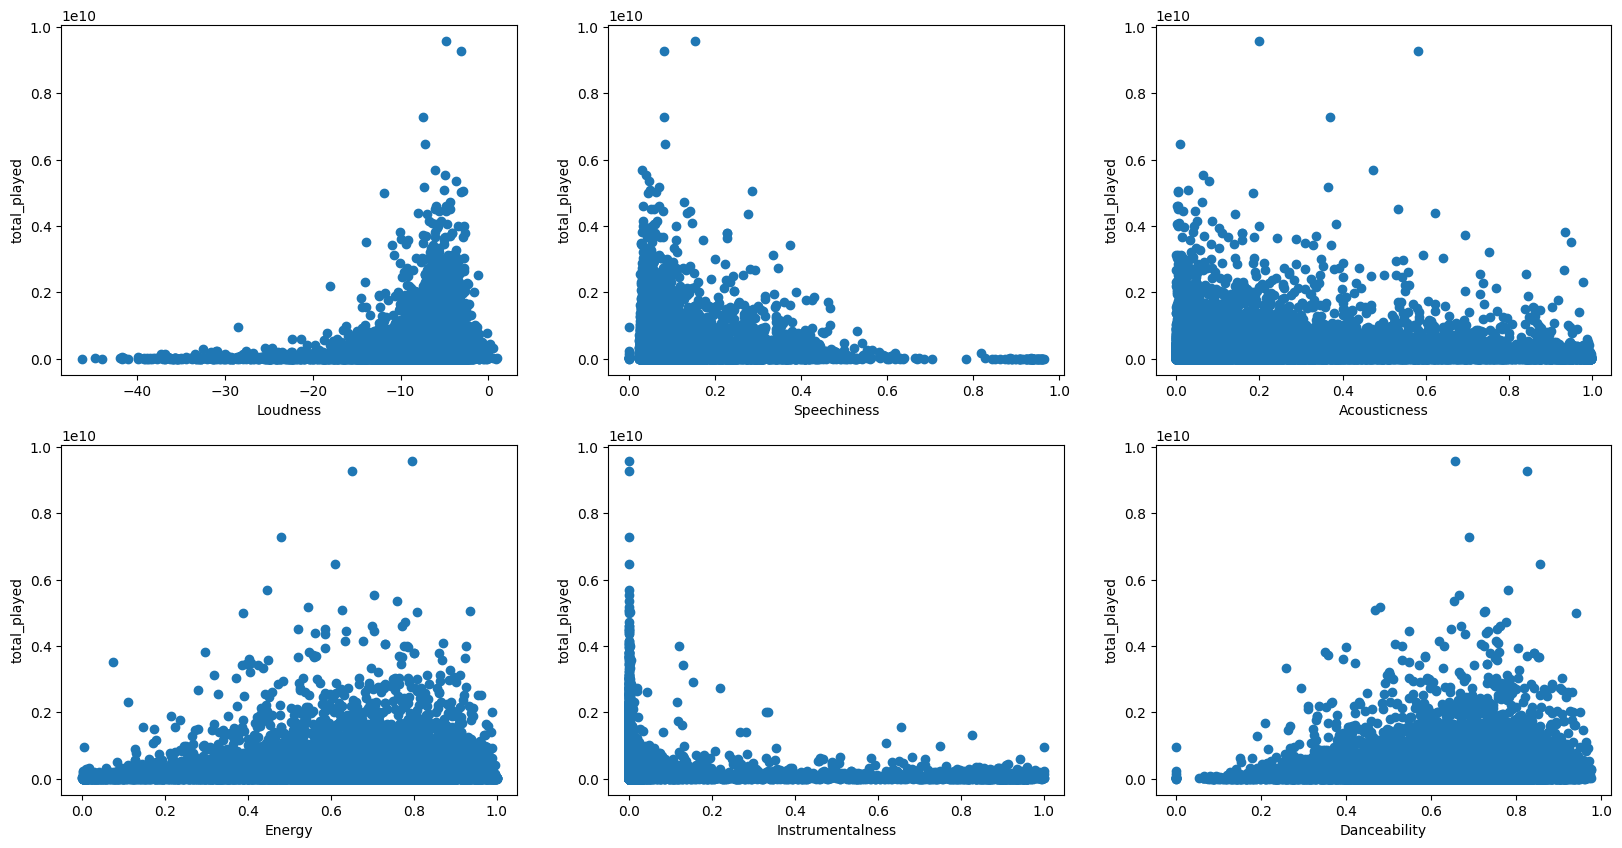

In [29]:
cols = ['Loudness', 'Speechiness', 'Acousticness', 'Energy', 'Instrumentalness', 'Danceability']
df5 = df[['Track', 'Stream', 'Views', 'Loudness', 'Speechiness', 'Acousticness', 'Energy', 'Instrumentalness', 'Danceability']]
df5 = df5.drop_duplicates(subset=['Track'], keep='first')
df5 = df5.drop(['Track'], axis=1)
df5['total_played'] = df5['Stream'] + df5['Views']
df5 = df5.drop(['Stream', 'Views'], axis=1)

#make a plot which contains scatter subplots for each column in cols vs total_played
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))
for i, ax in enumerate(axes.flatten()):
    ax.scatter(df5[cols[i]], df5['total_played'])
    ax.set_xlabel(cols[i])
    ax.set_ylabel('total_played')
plt.show()


<h2>Plotting Different Music Parameters Against Each Other</h2>

<Axes: title={'center': 'Loudness vs Energy'}, xlabel='Loudness', ylabel='Energy'>

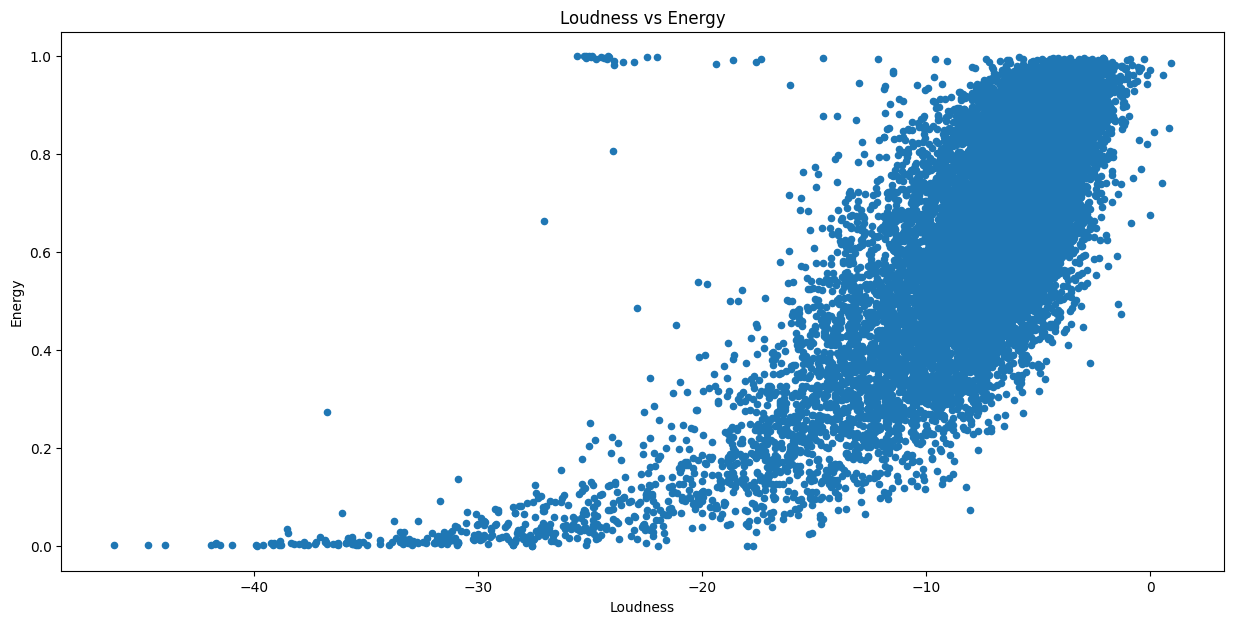

In [30]:
#plot a scatter plot for loudness and energy
df5.plot.scatter(x='Loudness', y='Energy', figsize=(15,7), title='Loudness vs Energy')


<Axes: title={'center': 'Loudness vs Acousticness'}, xlabel='Loudness', ylabel='Acousticness'>

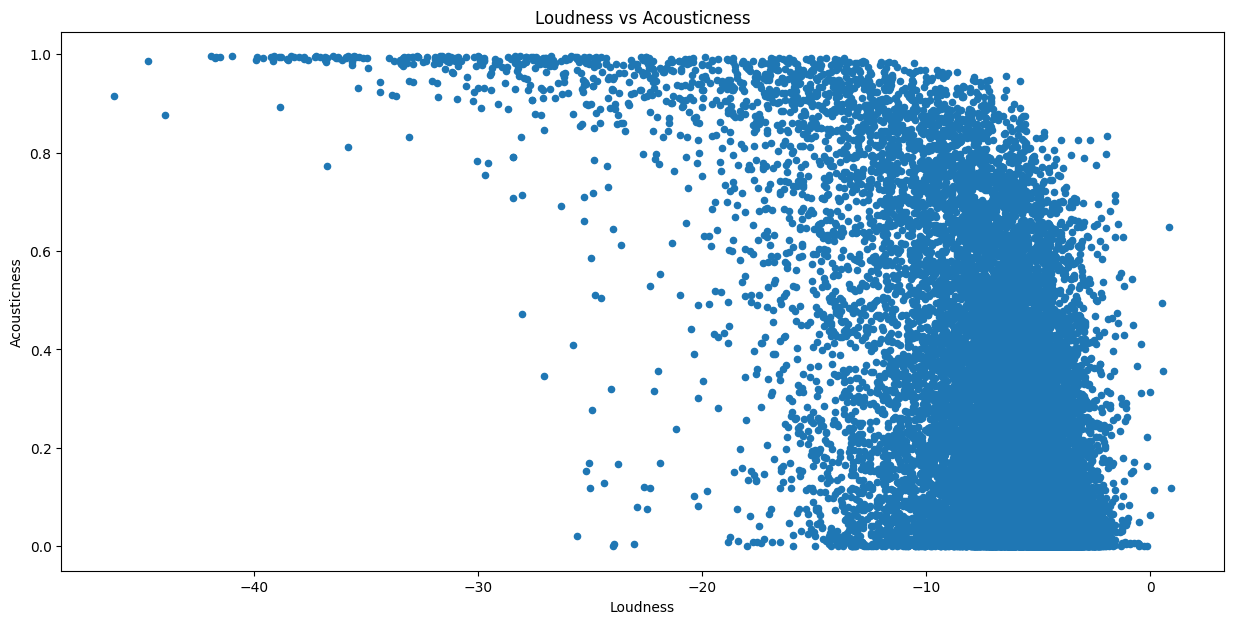

In [31]:
#plot a scatter plot for loudness and acousticness
df5.plot.scatter(x='Loudness', y='Acousticness', figsize=(15,7), title='Loudness vs Acousticness')


<h2>HeatMap to Represent the Correlation Between Each Factors including Total Times the Song is Played</h2>

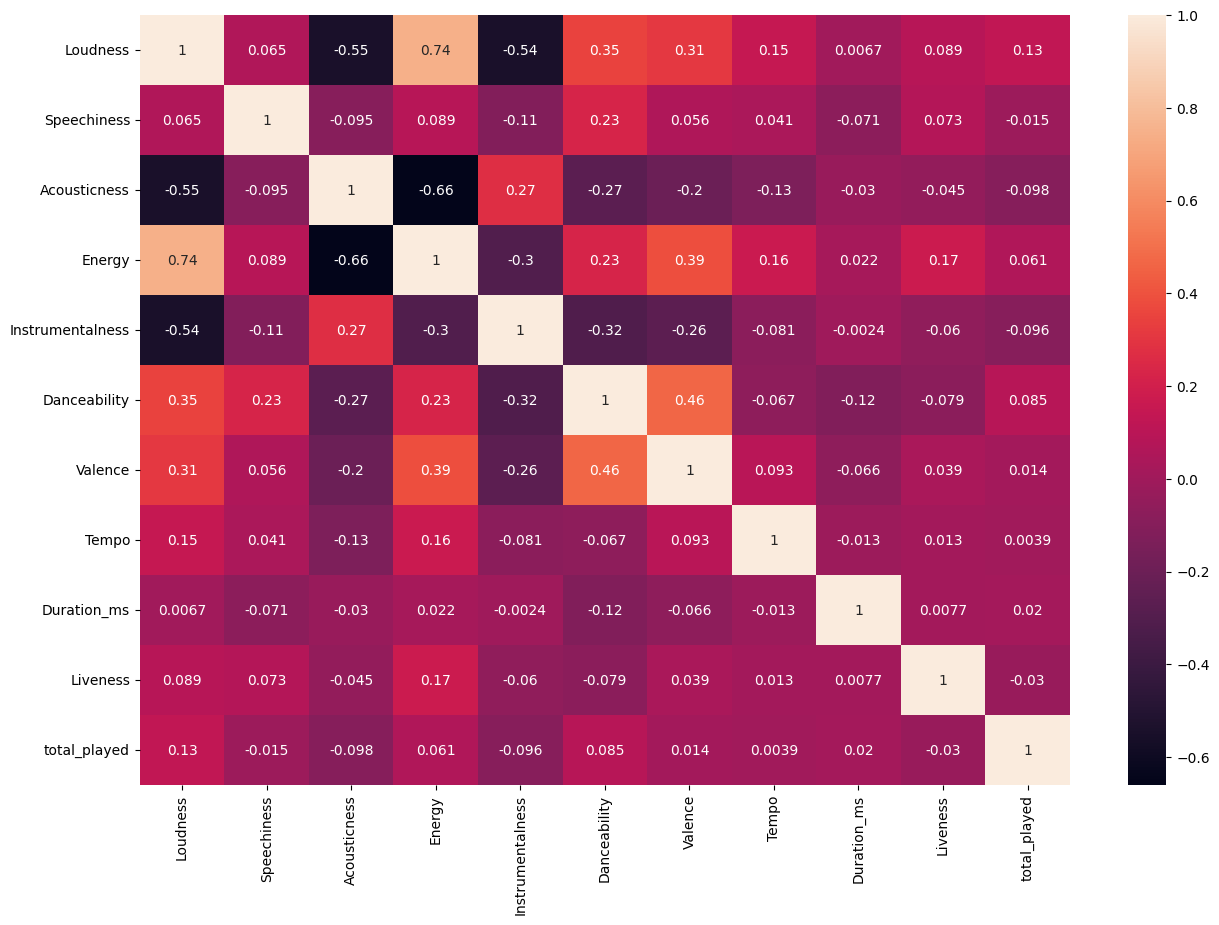

In [32]:
df5 = df[['Track', 'Stream', 'Views', 'Loudness', 'Speechiness', 'Acousticness', 'Energy', 'Instrumentalness', 'Danceability', 'Valence', 'Tempo', 'Duration_ms', 'Liveness']]
df5 = df5.drop_duplicates(subset=['Track'], keep='first')
df5 = df5.drop(['Track'], axis=1)
df5['total_played'] = df5['Stream'] + df5['Views']
df5 = df5.drop(['Stream', 'Views'], axis=1)

#plot a heatmap for df5
plt.figure(figsize=(15,10))
sns.heatmap(df5.corr(), annot=True)
plt.show()




<h2>Statistics such as Mean, Variance and Standard Deviations of the Population</h2>

In [33]:
data = df[['Track', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Tempo', 'Instrumentalness', 'Duration_ms', 'Liveness', 'Valence', 'Danceability']]
data = data.drop_duplicates(subset=['Track'], keep='first')
data = data.drop(['Track'], axis=1)

In [34]:
population_means = data.mean()
print("Population Means:")
population_means

Population Means:


Energy                   0.636366
Loudness                -7.659451
Speechiness              0.094387
Acousticness             0.286431
Tempo                  120.691649
Instrumentalness         0.056693
Duration_ms         222724.736387
Liveness                 0.191779
Valence                  0.529772
Danceability             0.619114
dtype: float64

In [35]:
population_variances = data.var()
print("Population Variances:")
population_variances

Population Variances:


Energy              4.624574e-02
Loudness            2.148004e+01
Speechiness         1.119639e-02
Acousticness        8.257605e-02
Tempo               8.798444e+02
Instrumentalness    3.759209e-02
Duration_ms         8.712616e+09
Liveness            2.744977e-02
Valence             6.072661e-02
Danceability        2.741249e-02
dtype: float64

In [36]:
population_sds = data.std()
print("Population Standarad Ddeviations:")
population_sds

Population Standarad Ddeviations:


Energy                  0.215048
Loudness                4.634657
Speechiness             0.105813
Acousticness            0.287360
Tempo                  29.662171
Instrumentalness        0.193887
Duration_ms         93341.395617
Liveness                0.165680
Valence                 0.246428
Danceability            0.165567
dtype: float64

<h2>Random Sampling and Calculating Sampling Error</h2>

In [37]:
sample_random = data.sample(n=1000).sort_index()

sample_random_means = sample_random.mean()

#print the mean
print("Random Sample Means:")
print(sample_random_means)

#find sampling error for all columns in data_songs_sample
sample_random_errors = sample_random_means - population_means

#abolute sampling error
sample_random_errors = abs(sample_random_errors)

print("######################################### Sampling Error #########################################")
#print the sampling error
print("Random Sampling Errors:")
print(sample_random_errors)

Random Sample Means:
Energy                   0.647019
Loudness                -7.510940
Speechiness              0.089769
Acousticness             0.278547
Tempo                  121.218108
Instrumentalness         0.054693
Duration_ms         224262.923000
Liveness                 0.188093
Valence                  0.525942
Danceability             0.612928
dtype: float64
######################################### Sampling Error #########################################
Random Sampling Errors:
Energy                 0.010653
Loudness               0.148511
Speechiness            0.004618
Acousticness           0.007884
Tempo                  0.526459
Instrumentalness       0.002000
Duration_ms         1538.186613
Liveness               0.003686
Valence                0.003830
Danceability           0.006186
dtype: float64


<h2>Systematic Sampling and Calculating Sampling Error</h2>

In [38]:
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample
    
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(data, (data.shape[0]//1000))

#find mean for all columns in systematic_sample
systematic_sample_means = systematic_sample.mean()

#print the mean
print("Systematic Sample Means: ")
print(systematic_sample_means)

#find sampling error for all columns in systematic_sample
systematic_sample_errors = systematic_sample_means - population_means

#abolute sampling error
systematic_sample_errors = abs(systematic_sample_errors)

print("######################################### Sampling Error #########################################")
#print the sampling error
print("Systematic Sampling Errors: ")
print(systematic_sample_errors)


Systematic Sample Means: 
Energy                   0.636069
Loudness                -7.694228
Speechiness              0.094503
Acousticness             0.277845
Tempo                  121.479746
Instrumentalness         0.052957
Duration_ms         221179.188406
Liveness                 0.192197
Valence                  0.531220
Danceability             0.625029
dtype: float64
######################################### Sampling Error #########################################
Systematic Sampling Errors: 
Energy                 0.000297
Loudness               0.034777
Speechiness            0.000116
Acousticness           0.008586
Tempo                  0.788097
Instrumentalness       0.003736
Duration_ms         1545.547981
Liveness               0.000418
Valence                0.001448
Danceability           0.005915
dtype: float64


<h2>Central Limit Theorem</h2>

Standard Error:  0.009336378464747306


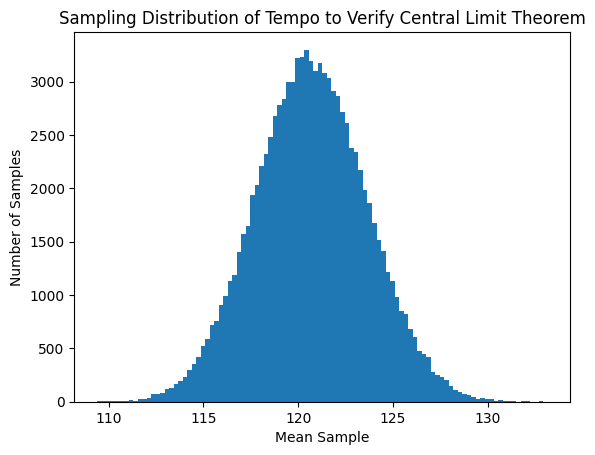

In [39]:
tempo = data['Tempo'].to_numpy()

number_of_samples=100000 #R
size_of_sample=100 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(tempo,size_of_sample,replace=False)))

_=plt.hist(sample_mean,bins=100)
_=plt.ylabel('Number of Samples')
_=plt.xlabel('Mean Sample')
_=plt.title('Sampling Distribution of Tempo to Verify Central Limit Theorem')
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
print("Standard Error: ",standard_error)

<h2>Bootstrap Sampling and Central Limit Theorem</h2>

Standard Error:  0.009375942252566329


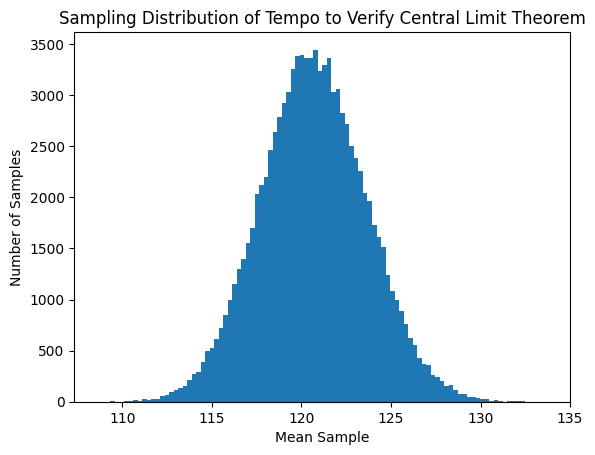

In [40]:
#Bootstrap Sampling
number_of_samples=100000 #R
size_of_sample=100 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(tempo,size_of_sample,replace=True)))
#sample_mean

_=plt.hist(sample_mean,bins=100)
_=plt.ylabel('Number of Samples')
_=plt.xlabel('Mean Sample')
_=plt.title('Sampling Distribution of Tempo to Verify Central Limit Theorem')
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
print("Standard Error: ",standard_error)

<h2>Calculating Confidence Interval</h2>

In [41]:
CI=0.95
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 114.91377
Upper level : 126.54853000000001
